<a href="https://colab.research.google.com/github/laouabdiasellami/electricity-classification-/blob/main/elec2_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!!pip install river

['Collecting river',
 '  Downloading river-0.21.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/3.1 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/3.1 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/3.1 MB\x1b \x1b316.2 kB/s\x1b eta \x1b0:00:10\x1b',
 '\x1b[2K     \x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.1/3.1 MB\x1b \x1b465.9 kB/s\x1b eta \x1b0:00:07\x1b',
 '\x1b[2K     \x1b━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.2/3.1 MB\x1b \x1b1.1 MB/s\x1b eta \x1b0:00:03\x1b',
 '\x1b[2K     \x1b━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.4/3.1 MB\x1b \x1b2.1 MB/s\x1b eta \x1b0:00:02\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.9/3.1 MB\x1b \x1b3.6 MB/s\x1b eta \x1

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.io import arff
import pandas as pd

# Load ARFF file
data, meta = arff.loadarff('electricity-normalized.arff')

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

# Save DataFrame as CSV
df.to_csv('electricity-normalized.csv', index=False)


In [ ]:
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,b'2',0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,b'UP'
1,0.0,b'2',0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,b'UP'
2,0.0,b'2',0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,b'UP'
3,0.0,b'2',0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,b'UP'
4,0.0,b'2',0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,b'DOWN'


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Convert the 'class' column to numerical labels
df['class'] = label_encoder.fit_transform(df['class'])

# Convert the 'class' column to numerical labels
df['day'] = label_encoder.fit_transform(df['day'])

df.head()



,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,1,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,1
1,0.0,1,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,1
2,0.0,1,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,1
3,0.0,1,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,1
4,0.0,1,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,0


**hoeffding tree**

In [ ]:
from river import datasets
from river import evaluate
from river import metrics
from river import tree
from sklearn.model_selection import train_test_split

# Convert 'day' column to string type and drop 'class' to form feature matrix X

X = df.drop(['class'], axis=1)
y = df['class']

# Split the dataset into training and testing setsac
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the Hoeffding Tree Classifier
model = tree.HoeffdingTreeClassifier(


)

# Train the model on the training set
for xi, yi in zip(X_train.iterrows(), y_train):
    model.learn_one(xi[1], yi)

# Evaluate the model on the test set
metric = metrics.Accuracy()
for xi, yi_true in zip(X_test.iterrows(), y_test):
    yi_pred = model.predict_one(xi[1])
    metric.update(yi_true, yi_pred)

print(f"Accuracy: {metric.get():.2%}")


Accuracy: 76.41%


In [ ]:
from river import datasets
from river import evaluate
from river import metrics
from river import forest
from river import drift,ensemble
from sklearn.model_selection import train_test_split

# Assuming data is your DataFrame


# Split the data into feature matrix X and target vector y
X = df.drop(['class'], axis=1)
y = df['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


model=ensemble.AdaBoostClassifier(model=tree.HoeffdingTreeClassifier(),n_models=5,seed=42)



# Train the model on the train set
for xi, yi in zip(X_train.iterrows(), y_train):
    model.learn_one(xi[1], yi)

# Evaluate the model on the test set
metric = metrics.Accuracy()
for xi, yi_true in zip(X_test.iterrows(), y_test):
    yi_pred = model.predict_one(xi[1])
    metric.update(yi_true, yi_pred)

print(f"Accuracy: {metric.get():.2%}")


Accuracy: 76.69%


In [ ]:
from river import datasets
from river import evaluate
from river import metrics
from river import forest
from river import drift
from sklearn.model_selection import train_test_split

# Assuming data is your DataFrame


# Split the data into feature matrix X and target vector y
X = df.drop(['class'], axis=1)
y = df['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


model=ensemble.BaggingClassifier(model=tree.HoeffdingTreeClassifier(),n_models=5,seed=42)



# Train the model on the train set
for xi, yi in zip(X_train.iterrows(), y_train):
    model.learn_one(xi[1], yi)

# Evaluate the model on the test set
metric = metrics.Accuracy()
for xi, yi_true in zip(X_test.iterrows(), y_test):
    yi_pred = model.predict_one(xi[1])
    metric.update(yi_true, yi_pred)

print(f"Accuracy: {metric.get():.2%}")


Accuracy: 77.38%


**ARF-DDM**

In [ ]:
from river import datasets
from river import evaluate
from river import metrics
from river import forest
from river import drift
from sklearn.model_selection import train_test_split

# Assuming data is your DataFrame


# Split the data into feature matrix X and target vector y
X = data.drop(['class'], axis=1)
y = data['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the ARFClassifier
model = forest.ARFClassifier(
    n_models=5,
    max_features='sqrt',
    lambda_value=6,
    drift_detector=drift.binary.DDM(),
    warning_detector=drift.binary.DDM(),
    grace_period=100,
    max_depth=None,  # No maximum depth
    split_criterion='info_gain',
    delta=0.01,
    tau=0.05,
    leaf_prediction='nba',
    nb_threshold=0,
    nominal_attributes=['']  # Assuming 'day' is a categorical attribute
)

# Train the model on the train set
for xi, yi in zip(X_train.iterrows(), y_train):
    model.learn_one(xi[1], yi)

# Evaluate the model on the test set
metric = metrics.Accuracy()
for xi, yi_true in zip(X_test.iterrows(), y_test):
    yi_pred = model.predict_one(xi[1])
    metric.update(yi_true, yi_pred)

print(f"Accuracy: {metric.get():.2%}")


Accuracy: 82.13%


**ARF+HDDM-A**

In [ ]:
from river import datasets
from river import evaluate
from river import metrics
from river import forest
from river import drift
from sklearn.model_selection import train_test_split

# Assuming data is your DataFrame


# Split the data into feature matrix X and target vector y
X = data.drop(['class'], axis=1)
y = data['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the ARFClassifier
model = forest.ARFClassifier(
    n_models=5,
    max_features='sqrt',
    lambda_value=6,
    drift_detector=drift.binary.HDDM_A(),
    warning_detector=drift.binary.HDDM_A(),
    grace_period=100,
    max_depth=None,  # No maximum depth
    split_criterion='info_gain',
    delta=0.01,
    tau=0.05,
    leaf_prediction='nba',
    nb_threshold=0,
    nominal_attributes=['']  # Assuming 'day' is a categorical attribute
)

# Train the model on the train set
for xi, yi in zip(X_train.iterrows(), y_train):
    model.learn_one(xi[1], yi)

# Evaluate the model on the test set
metric = metrics.Accuracy()
for xi, yi_true in zip(X_test.iterrows(), y_test):
    yi_pred = model.predict_one(xi[1])
    metric.update(yi_true, yi_pred)

print(f"Accuracy: {metric.get():.2%}")


Accuracy: 80.65%


**ARF+HDDM_W**

**ARF+EDDM**

In [ ]:
from river import datasets
from river import evaluate
from river import metrics
from river import forest
from river import drift
from sklearn.model_selection import train_test_split

# Assuming data is your DataFrame


# Split the data into feature matrix X and target vector y
X = data.drop(['class'], axis=1)
y = data['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the ARFClassifier
model = forest.ARFClassifier(
    n_models=5,
    max_features='sqrt',
    lambda_value=6,
    drift_detector=drift.binary.EDDM(),
    warning_detector=drift.binary.EDDM(),
    grace_period=100,
    max_depth=None,  # No maximum depth
    split_criterion='info_gain',
    delta=0.01,
    tau=0.05,
    leaf_prediction='nba',
    nb_threshold=0,
    nominal_attributes=['']  # Assuming 'day' is a categorical attribute
)

# Train the model on the train set
for xi, yi in zip(X_train.iterrows(), y_train):
    model.learn_one(xi[1], yi)

# Evaluate the model on the test set
metric = metrics.Accuracy()
for xi, yi_true in zip(X_test.iterrows(), y_test):
    yi_pred = model.predict_one(xi[1])
    metric.update(yi_true, yi_pred)

print(f"Accuracy: {metric.get():.2%}")


Accuracy: 81.88%


**ARF+ADWIN**

In [ ]:
from river import datasets
from river import evaluate
from river import metrics
from river import forest
from river import drift
from sklearn.model_selection import train_test_split

# Assuming data is your DataFrame


# Split the data into feature matrix X and target vector y
X = data.drop(['class'], axis=1)
y = data['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the ARFClassifier
model = forest.ARFClassifier(
    n_models=5,
    max_features='sqrt',
    lambda_value=6,
    drift_detector=drift.ADWIN(),
    warning_detector=drift.ADWIN(),
    grace_period=100,
    max_depth=None,  # No maximum depth
    split_criterion='info_gain',
    delta=0.01,
    tau=0.05,
    leaf_prediction='nba',
    nb_threshold=0,
    nominal_attributes=['']  # Assuming 'day' is a categorical attribute
)

# Train the model on the train set
for xi, yi in zip(X_train.iterrows(), y_train):
    model.learn_one(xi[1], yi)

# Evaluate the model on the test set
metric = metrics.Accuracy()
for xi, yi_true in zip(X_test.iterrows(), y_test):
    yi_pred = model.predict_one(xi[1])
    metric.update(yi_true, yi_pred)

print(f"Accuracy: {metric.get():.2%}")


Accuracy: 80.11%


**SRP+DDM**

In [ ]:
from river import datasets
from river import evaluate
from river import metrics
from river import ensemble
from river import drift
from sklearn.model_selection import train_test_split

# Assuming data is your DataFrame
# Split the data into feature matrix X and target vector y
X = data.drop(['class'], axis=1)
y = data['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the SRPClassifier
model = ensemble.SRPClassifier(
    n_models=5,  # Number of members in the ensemble
    drift_detector=drift.binary.DDM(),  # Drift detector to use
    warning_detector=drift.binary.DDM(),  # Warning detector to use
)

# Train the model on the train set
for xi, yi in zip(X_train.iterrows(), y_train):
    model.learn_one(xi[1], yi)

# Evaluate the model on the test set
metric = metrics.Accuracy()
for xi, yi_true in zip(X_test.iterrows(), y_test):
    yi_pred = model.predict_one(xi[1])
    metric.update(yi_true, yi_pred)

print(f"Accuracy: {metric.get():.2%}")


Accuracy: 83.54%


**SRP+HDDM_A**

In [ ]:
from river import datasets
from river import evaluate
from river import metrics
from river import ensemble
from river import drift
from sklearn.model_selection import train_test_split

# Assuming data is your DataFrame
# Split the data into feature matrix X and target vector y
X = data.drop(['class'], axis=1)
y = data['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the SRPClassifier
model = ensemble.SRPClassifier(
    n_models=5,  # Number of members in the ensemble
    drift_detector=drift.binary.HDDM_A(),  # Drift detector to use
    warning_detector=drift.binary.HDDM_A(),  # Warning detector to use
)

# Train the model on the train set
for xi, yi in zip(X_train.iterrows(), y_train):
    model.learn_one(xi[1], yi)

# Evaluate the model on the test set
metric = metrics.Accuracy()
for xi, yi_true in zip(X_test.iterrows(), y_test):
    yi_pred = model.predict_one(xi[1])
    metric.update(yi_true, yi_pred)

print(f"Accuracy: {metric.get():.2%}")


Accuracy: 84.20%


**SRP+EDDM**

In [ ]:
from river import datasets
from river import evaluate
from river import metrics
from river import ensemble
from river import drift
from sklearn.model_selection import train_test_split

# Assuming data is your DataFrame
# Split the data into feature matrix X and target vector y
X = data.drop(['class'], axis=1)
y = data['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the SRPClassifier
model = ensemble.SRPClassifier(
    n_models=5,  # Number of members in the ensemble
    drift_detector=drift.binary.EDDM(),  # Drift detector to use
    warning_detector=drift.binary.EDDM(),  # Warning detector to use
)

# Train the model on the train set
for xi, yi in zip(X_train.iterrows(), y_train):
    model.learn_one(xi[1], yi)

# Evaluate the model on the test set
metric = metrics.Accuracy()
for xi, yi_true in zip(X_test.iterrows(), y_test):
    yi_pred = model.predict_one(xi[1])
    metric.update(yi_true, yi_pred)

print(f"Accuracy: {metric.get():.2%}")


Accuracy: 82.79%


**SRP+ADWIN**

In [ ]:
from river import datasets
from river import evaluate
from river import metrics
from river import ensemble
from river import drift
from sklearn.model_selection import train_test_split

# Assuming data is your DataFrame
# Split the data into feature matrix X and target vector y
X = data.drop(['class'], axis=1)
y = data['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the SRPClassifier
model = ensemble.SRPClassifier(
    n_models=5,  # Number of members in the ensemble
    drift_detector=drift.ADWIN(),  # Drift detector to use
    warning_detector=drift.ADWIN(),  # Warning detector to use
)

# Train the model on the train set
for xi, yi in zip(X_train.iterrows(), y_train):
    model.learn_one(xi[1], yi)

# Evaluate the model on the test set
metric = metrics.Accuracy()
for xi, yi_true in zip(X_test.iterrows(), y_test):
    yi_pred = model.predict_one(xi[1])
    metric.update(yi_true, yi_pred)

print(f"Accuracy: {metric.get():.2%}")


Accuracy: 82.71%


**FE_HDD: DDM+ADWIN**

In [ ]:
from river import metrics, stream, forest, ensemble, drift
from sklearn.metrics import classification_report

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

def NewApproach(X_train, y_train, X_test, y_test):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(4)]

    # Initialize base learners
    base_learners = [
        forest.ARFClassifier(n_models=5),  # ARF-ADWIN
        ensemble.SRPClassifier(n_models=5),  # SRP-ADWIN
        forest.ARFClassifier(n_models=5, drift_detector=drift.binary.DDM(), warning_detector=drift.binary.DDM()),  # ARF-DDM
        ensemble.SRPClassifier(n_models=5, drift_detector=drift.binary.DDM(), warning_detector=drift.binary.DDM())  # SRP-DDM
    ]

    # Train base learners on the training set
    for learner in base_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    iterations = []
    ensemble_accuracies = []
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(base_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        iterations.append(iteration)
        ensemble_accuracies.append(ensemble_metric.get() * 100)
        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    # Print classification report
    print(classification_report(true_labels, predicted_labels))

    # Display performance metrics
    print("Accuracy: {:.2f}%".format(accuracy_score(true_labels, predicted_labels) * 100))
    print("Precision: {:.2f}%".format(precision_score(true_labels, predicted_labels) * 100))
    print("Recall: {:.2f}%".format(recall_score(true_labels, predicted_labels) * 100))
    print("F1-score: {:.2f}%".format(f1_score(true_labels, predicted_labels) * 100))

    return None

import pandas as pd
from river import metrics
from river import stream
from river import tree, neighbors, ensemble, linear_model
from river.drift.binary import EDDM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder





df = pd.DataFrame(data)

# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

#convert categorical target variable to numerical using LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the ensemble function
NewApproach(X_train, y_train, X_test, y_test)



              precision    recall  f1-score   support

           0       0.82      0.89      0.85     23438
           1       0.83      0.73      0.78     17343

    accuracy                           0.82     40781
   macro avg       0.82      0.81      0.81     40781
weighted avg       0.82      0.82      0.82     40781

Accuracy: 82.16%
Precision: 82.68%
Recall: 73.42%
F1-score: 77.78%


**FE_HDD: ADWIN+HDDM_A**

In [ ]:
from river import metrics, stream, forest, ensemble, drift
from sklearn.metrics import classification_report

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

def NewApproach(X_train, y_train, X_test, y_test):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(4)]

    # Initialize base learners
    base_learners = [
        forest.ARFClassifier(n_models=5),  # ARF-ADWIN
        ensemble.SRPClassifier(n_models=5),  # SRP-ADWIN
        forest.ARFClassifier(n_models=5, drift_detector=drift.binary.HDDM_A(), warning_detector=drift.binary.HDDM_A()),  # ARF-DDM
        ensemble.SRPClassifier(n_models=5, drift_detector=drift.binary.HDDM_A(), warning_detector=drift.binary.HDDM_A())  # SRP-DDM
    ]

    # Train base learners on the training set
    for learner in base_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    iterations = []
    ensemble_accuracies = []
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(base_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        iterations.append(iteration)
        ensemble_accuracies.append(ensemble_metric.get() * 100)
        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    # Print classification report
    print(classification_report(true_labels, predicted_labels))

    # Display performance metrics
    print("Accuracy: {:.2f}%".format(accuracy_score(true_labels, predicted_labels) * 100))
    print("Precision: {:.2f}%".format(precision_score(true_labels, predicted_labels) * 100))
    print("Recall: {:.2f}%".format(recall_score(true_labels, predicted_labels) * 100))
    print("F1-score: {:.2f}%".format(f1_score(true_labels, predicted_labels) * 100))

    return None

import pandas as pd
from river import metrics
from river import stream
from river import tree, neighbors, ensemble, linear_model
from river.drift.binary import EDDM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder





df = pd.DataFrame(data)

# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

#convert categorical target variable to numerical using LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the ensemble function
NewApproach(X_train, y_train, X_test, y_test)



              precision    recall  f1-score   support

           0       0.84      0.91      0.87      5191
           1       0.86      0.78      0.82      3872

    accuracy                           0.85      9063
   macro avg       0.85      0.84      0.84      9063
weighted avg       0.85      0.85      0.85      9063

Accuracy: 84.99%
Precision: 85.91%
Recall: 77.61%
F1-score: 81.55%


**FE_HDD: ADWIN+EDDM**

In [ ]:
from river import metrics, stream, forest, ensemble, drift
from sklearn.metrics import classification_report

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

def NewApproach(X_train, y_train, X_test, y_test):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(4)]

    # Initialize base learners
    base_learners = [
        forest.ARFClassifier(n_models=5),  # ARF-ADWIN
        ensemble.SRPClassifier(n_models=5),  # SRP-ADWIN
        forest.ARFClassifier(n_models=5, drift_detector=drift.binary.EDDM(), warning_detector=drift.binary.EDDM()),  # ARF-DDM
        ensemble.SRPClassifier(n_models=5, drift_detector=drift.binary.EDDM(), warning_detector=drift.binary.EDDM())  # SRP-DDM
    ]

    # Train base learners on the training set
    for learner in base_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    iterations = []
    ensemble_accuracies = []
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(base_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        iterations.append(iteration)
        ensemble_accuracies.append(ensemble_metric.get() * 100)
        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    # Print classification report
    print(classification_report(true_labels, predicted_labels))

    # Display performance metrics
    print("Accuracy: {:.2f}%".format(accuracy_score(true_labels, predicted_labels) * 100))
    print("Precision: {:.2f}%".format(precision_score(true_labels, predicted_labels) * 100))
    print("Recall: {:.2f}%".format(recall_score(true_labels, predicted_labels) * 100))
    print("F1-score: {:.2f}%".format(f1_score(true_labels, predicted_labels) * 100))

    return None

import pandas as pd
from river import metrics
from river import stream
from river import tree, neighbors, ensemble, linear_model
from river.drift.binary import EDDM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder





df = pd.DataFrame(data)

# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

#convert categorical target variable to numerical using LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the ensemble function
NewApproach(X_train, y_train, X_test, y_test)



              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5191
           1       0.85      0.76      0.81      3872

    accuracy                           0.84      9063
   macro avg       0.85      0.83      0.84      9063
weighted avg       0.84      0.84      0.84      9063

Accuracy: 84.30%
Precision: 85.38%
Recall: 76.32%
F1-score: 80.59%


**FE_HDD: DDM+HDDM_A**

In [ ]:
from river import metrics, stream, forest, ensemble, drift
from sklearn.metrics import classification_report

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

def NewApproach(X_train, y_train, X_test, y_test):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(4)]

    # Initialize base learners
    base_learners = [

        forest.ARFClassifier(n_models=5, drift_detector=drift.binary.DDM(), warning_detector=drift.binary.DDM()),  # ARF-DDM
        ensemble.SRPClassifier(n_models=5, drift_detector=drift.binary.DDM(), warning_detector=drift.binary.DDM()) , # SRP-DDM
        forest.ARFClassifier(n_models=5, drift_detector=drift.binary.HDDM_A(), warning_detector=drift.binary.HDDM_A()),  # ARF-DDM
        ensemble.SRPClassifier(n_models=5, drift_detector=drift.binary.HDDM_A(), warning_detector=drift.binary.HDDM_A())  # SRP-DDM
    ]

    # Train base learners on the training set
    for learner in base_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    iterations = []
    ensemble_accuracies = []
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(base_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        iterations.append(iteration)
        ensemble_accuracies.append(ensemble_metric.get() * 100)
        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    # Print classification report
    print(classification_report(true_labels, predicted_labels))

    # Display performance metrics
    print("Accuracy: {:.2f}%".format(accuracy_score(true_labels, predicted_labels) * 100))
    print("Precision: {:.2f}%".format(precision_score(true_labels, predicted_labels) * 100))
    print("Recall: {:.2f}%".format(recall_score(true_labels, predicted_labels) * 100))
    print("F1-score: {:.2f}%".format(f1_score(true_labels, predicted_labels) * 100))

    return None

import pandas as pd
from river import metrics
from river import stream
from river import tree, neighbors, ensemble, linear_model
from river.drift.binary import EDDM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder





df = pd.DataFrame(data)

# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

#convert categorical target variable to numerical using LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the ensemble function
NewApproach(X_train, y_train, X_test, y_test)



              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5191
           1       0.87      0.78      0.82      3872

    accuracy                           0.85      9063
   macro avg       0.86      0.84      0.85      9063
weighted avg       0.86      0.85      0.85      9063

Accuracy: 85.45%
Precision: 86.78%
Recall: 77.79%
F1-score: 82.04%


**FE_HDD: DDM+EDDM**

In [ ]:
from river import metrics, stream, forest, ensemble, drift
from sklearn.metrics import classification_report

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

def NewApproach(X_train, y_train, X_test, y_test):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(4)]

    # Initialize base learners
    base_learners = [

        forest.ARFClassifier(n_models=5, drift_detector=drift.binary.DDM(), warning_detector=drift.binary.DDM()),  # ARF-DDM
        ensemble.SRPClassifier(n_models=5, drift_detector=drift.binary.DDM(), warning_detector=drift.binary.DDM()) , # SRP-DDM
        forest.ARFClassifier(n_models=5, drift_detector=drift.binary.EDDM(), warning_detector=drift.binary.EDDM()),  # ARF-DDM
        ensemble.SRPClassifier(n_models=5, drift_detector=drift.binary.EDDM(), warning_detector=drift.binary.EDDM())  # SRP-DDM
    ]

    # Train base learners on the training set
    for learner in base_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    iterations = []
    ensemble_accuracies = []
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(base_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        iterations.append(iteration)
        ensemble_accuracies.append(ensemble_metric.get() * 100)
        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    # Print classification report
    print(classification_report(true_labels, predicted_labels))

    # Display performance metrics
    print("Accuracy: {:.2f}%".format(accuracy_score(true_labels, predicted_labels) * 100))
    print("Precision: {:.2f}%".format(precision_score(true_labels, predicted_labels) * 100))
    print("Recall: {:.2f}%".format(recall_score(true_labels, predicted_labels) * 100))
    print("F1-score: {:.2f}%".format(f1_score(true_labels, predicted_labels) * 100))

    return None

import pandas as pd
from river import metrics
from river import stream
from river import tree, neighbors, ensemble, linear_model
from river.drift.binary import EDDM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder





df = pd.DataFrame(data)

# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

#convert categorical target variable to numerical using LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the ensemble function
NewApproach(X_train, y_train, X_test, y_test)



              precision    recall  f1-score   support

           0       0.84      0.91      0.87      5191
           1       0.86      0.77      0.81      3872

    accuracy                           0.85      9063
   macro avg       0.85      0.84      0.84      9063
weighted avg       0.85      0.85      0.85      9063

Accuracy: 84.83%
Precision: 86.03%
Recall: 76.99%
F1-score: 81.26%


**FE_HDD: EDDM+HDDM_A**

In [ ]:
from river import metrics, stream, forest, ensemble, drift
from sklearn.metrics import classification_report

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

def NewApproach(X_train, y_train, X_test, y_test):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(4)]

    # Initialize base learners
    base_learners = [

        forest.ARFClassifier(n_models=5, drift_detector=drift.binary.EDDM(), warning_detector=drift.binary.EDDM()),  # ARF-DDM
        ensemble.SRPClassifier(n_models=5, drift_detector=drift.binary.EDDM(), warning_detector=drift.binary.EDDM()) , # SRP-DDM
        forest.ARFClassifier(n_models=5, drift_detector=drift.binary.HDDM_A(), warning_detector=drift.binary.HDDM_A()),  # ARF-DDM
        ensemble.SRPClassifier(n_models=5, drift_detector=drift.binary.HDDM_A(), warning_detector=drift.binary.HDDM_A())  # SRP-DDM
    ]

    # Train base learners on the training set
    for learner in base_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    iterations = []
    ensemble_accuracies = []
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(base_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        iterations.append(iteration)
        ensemble_accuracies.append(ensemble_metric.get() * 100)
        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    # Print classification report
    print(classification_report(true_labels, predicted_labels))

    # Display performance metrics
    print("Accuracy: {:.2f}%".format(accuracy_score(true_labels, predicted_labels) * 100))
    print("Precision: {:.2f}%".format(precision_score(true_labels, predicted_labels) * 100))
    print("Recall: {:.2f}%".format(recall_score(true_labels, predicted_labels) * 100))
    print("F1-score: {:.2f}%".format(f1_score(true_labels, predicted_labels) * 100))

    return None

import pandas as pd
from river import metrics
from river import stream
from river import tree, neighbors, ensemble, linear_model
from river.drift.binary import EDDM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder





df = pd.DataFrame(data)

# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

#convert categorical target variable to numerical using LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the ensemble function
NewApproach(X_train, y_train, X_test, y_test)



              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5191
           1       0.86      0.78      0.82      3872

    accuracy                           0.85      9063
   macro avg       0.85      0.84      0.84      9063
weighted avg       0.85      0.85      0.85      9063

Accuracy: 84.98%
Precision: 85.62%
Recall: 77.94%
F1-score: 81.60%


**LEVERAGING BAGGING**

In [ ]:
from river import datasets
from river import evaluate
from river import metrics
from river import forest
from river import drift
from river import ensemble,tree
from sklearn.model_selection import train_test_split

# Assuming data is your DataFrame


# Split the data into feature matrix X and target vector y
X = df.drop(['class'], axis=1)
y = df['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


model=ensemble.LeveragingBaggingClassifier(model=tree.HoeffdingTreeClassifier(),n_models=5)



# Train the model on the train set
for xi, yi in zip(X_train.iterrows(), y_train):
    model.learn_one(xi[1], yi)

# Evaluate the model on the test set
metric = metrics.Accuracy()
for xi, yi_true in zip(X_test.iterrows(), y_test):
    yi_pred = model.predict_one(xi[1])
    metric.update(yi_true, yi_pred)

print(f"Accuracy: {metric.get():.2%}")


Accuracy: 79.77%


**ADABOOST**

In [ ]:
from river import datasets
from river import evaluate
from river import metrics
from river import forest
from river import drift
from sklearn.model_selection import train_test_split

# Assuming data is your DataFrame


# Split the data into feature matrix X and target vector y
X =df.drop(['class'], axis=1)
y = df['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


model=ensemble.AdaBoostClassifier(model=tree.HoeffdingTreeClassifier(),n_models=20)



# Train the model on the train set
for xi, yi in zip(X_train.iterrows(), y_train):
    model.learn_one(xi[1], yi)

# Evaluate the model on the test set
metric = metrics.Accuracy()
for xi, yi_true in zip(X_test.iterrows(), y_test):
    yi_pred = model.predict_one(xi[1])
    metric.update(yi_true, yi_pred)

print(f"Accuracy: {metric.get():.2%}")


Accuracy: 78.44%


**Newest Approach: dynamic classifier selection **

In [ ]:
from river import metrics, stream, forest, ensemble, drift
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

def NewApproach(X_train, y_train, X_test, y_test, base_learner, drift_detectors):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(4)]

    # Initialize base learners
    base_learners = [
        base_learner(n_models=5, drift_detector=dd(), warning_detector=dd())
        for dd in drift_detectors
    ]

    # Train base learners on the training set
    for learner in base_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(base_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    # Print classification report
    print(classification_report(true_labels, predicted_labels))

    # Display performance metrics
    print("Accuracy: {:.2f}%".format(accuracy_score(true_labels, predicted_labels) * 100))
    print("Precision: {:.2f}%".format(precision_score(true_labels, predicted_labels) * 100))
    print("Recall: {:.2f}%".format(recall_score(true_labels, predicted_labels) * 100))
    print("F1-score: {:.2f}%".format(f1_score(true_labels, predicted_labels) * 100))

    return None

# Load your data and preprocess it here
df = pd.DataFrame(df)

# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert categorical target variable to numerical using LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ARF with DDM itself
print("SRP with HDDMA itself:")
NewApproach(X_train, y_train, X_test, y_test, ensemble.SRPClassifier, [drift.binary.HDDM_A])

# ARF with ADWIN itself
print("\nSRP with DDM itself:")
NewApproach(X_train, y_train, X_test, y_test,  ensemble.SRPClassifier, [drift.binary.DDM])

# Both ARF with DDM and ARF with ADWIN
print("\nBoth SRP with DDM and HDDMA :")
NewApproach(X_train, y_train, X_test, y_test,  ensemble.SRPClassifier, [drift.binary.HDDM_A, drift.binary.DDM])



SRP with HDDMA itself:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5191
           1       0.83      0.77      0.80      3872

    accuracy                           0.84      9063
   macro avg       0.84      0.83      0.83      9063
weighted avg       0.84      0.84      0.83      9063

Accuracy: 83.58%
Precision: 83.15%
Recall: 77.22%
F1-score: 80.07%

SRP with DDM itself:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5191
           1       0.83      0.77      0.80      3872

    accuracy                           0.84      9063
   macro avg       0.83      0.83      0.83      9063
weighted avg       0.84      0.84      0.83      9063

Accuracy: 83.55%
Precision: 83.21%
Recall: 77.04%
F1-score: 80.01%

Both SRP with DDM and HDDMA :
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5191
           1       0.86    

TypeError: 'list' object is not callable

**newest approach2**

SRP with HDDMA itself:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5191
           1       0.83      0.78      0.81      3872

    accuracy                           0.84      9063
   macro avg       0.84      0.83      0.83      9063
weighted avg       0.84      0.84      0.84      9063

Accuracy: 83.92%
Precision: 83.16%
Recall: 78.20%
F1-score: 80.61%

SRP with DDM itself:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5191
           1       0.85      0.80      0.82      3872

    accuracy                           0.85      9063
   macro avg       0.85      0.84      0.85      9063
weighted avg       0.85      0.85      0.85      9063

Accuracy: 85.17%
Precision: 84.71%
Recall: 79.67%
F1-score: 82.11%

Both SRP with DDM and HDDMA:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      5191
           1       0.86     

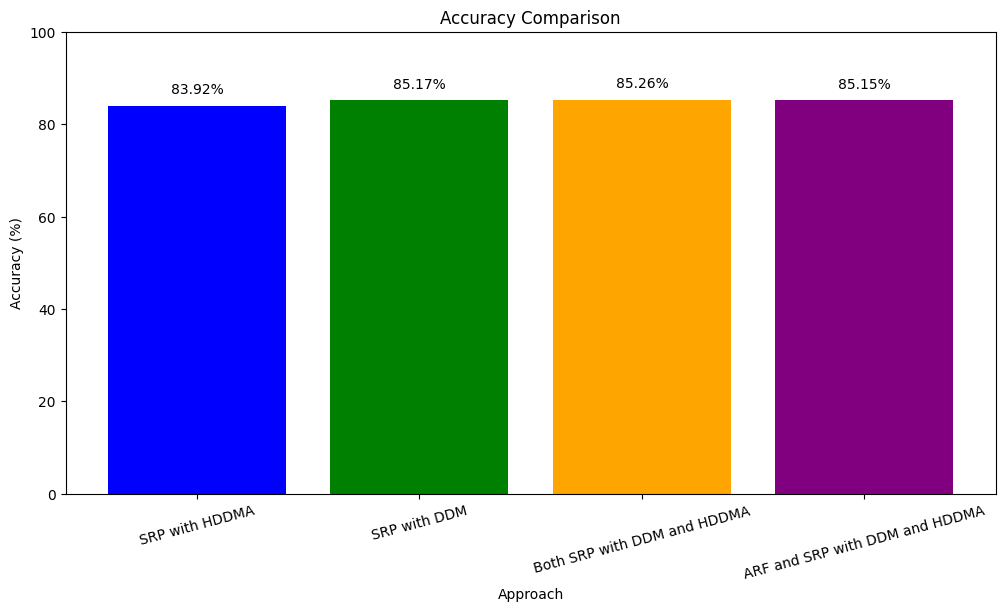

In [ ]:
from river import metrics, stream, forest, ensemble, drift
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

def NewApproach(X_train, y_train, X_test, y_test, base_learners, drift_detectors):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(len(base_learners) * len(drift_detectors))]

    # Initialize base learners
    all_learners = []
    for learner_cls in base_learners:
        for dd in drift_detectors:
            all_learners.append(learner_cls(n_models=5, drift_detector=dd(), warning_detector=dd()))

    # Train base learners on the training set
    for learner in all_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(all_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    # Print classification report
    print(classification_report(true_labels, predicted_labels))

    # Display performance metrics
    accuracy = accuracy_score(true_labels, predicted_labels) * 100
    precision = precision_score(true_labels, predicted_labels) * 100
    recall = recall_score(true_labels, predicted_labels) * 100
    f1 = f1_score(true_labels, predicted_labels) * 100

    print("Accuracy: {:.2f}%".format(accuracy))
    print("Precision: {:.2f}%".format(precision))
    print("Recall: {:.2f}%".format(recall))
    print("F1-score: {:.2f}%".format(f1))

    return accuracy, precision, recall, f1

# Load your data and preprocess it here
df = pd.DataFrame(df)

# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert categorical target variable to numerical using LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Collecting accuracies
accuracies = {}

# SRP with HDDMA itself
print("SRP with HDDMA itself:")
accuracies['SRP with HDDMA'] = NewApproach(X_train, y_train, X_test, y_test, [ensemble.SRPClassifier], [drift.binary.HDDM_A])

# SRP with DDM itself
print("\nSRP with DDM itself:")
accuracies['SRP with DDM'] = NewApproach(X_train, y_train, X_test, y_test, [ensemble.SRPClassifier], [drift.binary.DDM])

# Both SRP with DDM and HDDMA
print("\nBoth SRP with DDM and HDDMA:")
accuracies['Both SRP with DDM and HDDMA'] = NewApproach(X_train, y_train, X_test, y_test, [ensemble.SRPClassifier], [drift.binary.HDDM_A, drift.binary.DDM])

# Both ARF and SRP with DDM and HDDMA
print("\nBoth ARF and SRP with DDM and HDDMA:")
accuracies['ARF and SRP with DDM and HDDMA'] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier, ensemble.SRPClassifier], [drift.binary.HDDM_A, drift.binary.DDM])

# Plotting the accuracies
import matplotlib.pyplot as plt

# Extracting the accuracies for plotting
labels = list(accuracies.keys())
accuracy_values = [acc[0] for acc in accuracies.values()]

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(labels, accuracy_values, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Approach')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.ylim(0, 100)

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracy_values):
    plt.text(i, acc + 2, f'{acc:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=15)
plt.show()



SRP with HDDM_A:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      5191
           1       0.83      0.79      0.81      3872

    accuracy                           0.84      9063
   macro avg       0.84      0.83      0.84      9063
weighted avg       0.84      0.84      0.84      9063

Accuracy: 83.96%
Precision: 82.75%
Recall: 78.90%
F1-score: 80.78%

SRP with DDM:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      5191
           1       0.84      0.77      0.80      3872

    accuracy                           0.84      9063
   macro avg       0.84      0.83      0.83      9063
weighted avg       0.84      0.84      0.84      9063

Accuracy: 84.00%
Precision: 84.09%
Recall: 77.14%
F1-score: 80.47%

SRP with ADWIN:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      5191
           1       0.81      0.73      0.77      3872

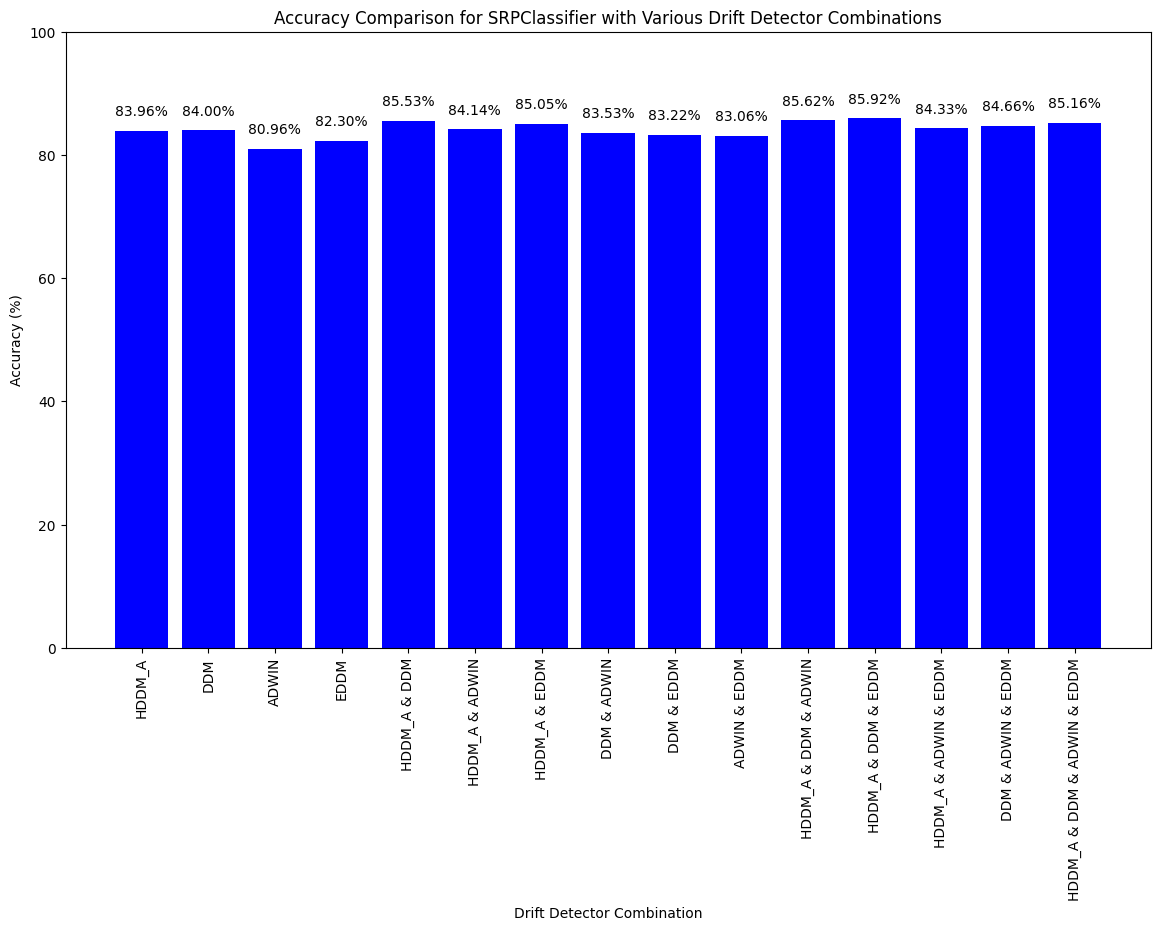

In [ ]:
from river import metrics, stream, ensemble, drift
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

def NewApproach(X_train, y_train, X_test, y_test, base_learner, drift_detectors):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(len(drift_detectors))]

    # Initialize base learners
    all_learners = []
    for dd in drift_detectors:
        all_learners.append(base_learner(n_models=5, drift_detector=dd(), warning_detector=dd()))

    # Train base learners on the training set
    for learner in all_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(all_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    # Print classification report
    print(classification_report(true_labels, predicted_labels))

    # Display performance metrics
    accuracy = accuracy_score(true_labels, predicted_labels) * 100
    precision = precision_score(true_labels, predicted_labels) * 100
    recall = recall_score(true_labels, predicted_labels) * 100
    f1 = f1_score(true_labels, predicted_labels) * 100

    print("Accuracy: {:.2f}%".format(accuracy))
    print("Precision: {:.2f}%".format(precision))
    print("Recall: {:.2f}%".format(recall))
    print("F1-score: {:.2f}%".format(f1))

    return accuracy, precision, recall, f1



df = pd.DataFrame(df)

# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert categorical target variable to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drift detectors
drift_detectors = [drift.binary.HDDM_A, drift.binary.DDM, drift.ADWIN, drift.binary.EDDM]

# Collecting accuracies
accuracies = {}

# Function to generate all combinations of drift detectors
def generate_combinations(drift_detectors):
    combos = []
    for r in range(1, len(drift_detectors) + 1):
        combos.extend(combinations(drift_detectors, r))
    return combos

# Evaluate each combination
for combo in generate_combinations(drift_detectors):
    combo_names = " & ".join([dd.__name__ for dd in combo])
    print(f"\nSRP with {combo_names}:")
    accuracies[combo_names] = NewApproach(X_train, y_train, X_test, y_test, ensemble.SRPClassifier, combo)

# Plotting the accuracies
# Extracting the accuracies for plotting
labels = list(accuracies.keys())
accuracy_values = [acc[0] for acc in accuracies.values()]

# Create bar plot
plt.figure(figsize=(14, 8))
plt.bar(labels, accuracy_values, color='blue')
plt.xlabel('Drift Detector Combination')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison for SRPClassifier with Various Drift Detector Combinations')
plt.ylim(0, 100)

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracy_values):
    plt.text(i, acc + 2, f'{acc:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()


**All cases possible**


ARF with HDDM_A:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      5191
           1       0.82      0.75      0.79      3872

    accuracy                           0.83      9063
   macro avg       0.82      0.82      0.82      9063
weighted avg       0.82      0.83      0.82      9063

Accuracy: 82.50%
Precision: 82.12%
Recall: 75.46%
F1-score: 78.65%

SRP with HDDM_A:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5191
           1       0.85      0.79      0.82      3872

    accuracy                           0.85      9063
   macro avg       0.85      0.84      0.84      9063
weighted avg       0.85      0.85      0.85      9063

Accuracy: 84.92%
Precision: 84.57%
Recall: 79.13%
F1-score: 81.76%

Both ARF and SRP with HDDM_A:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5191
           1       0.86      0.77   

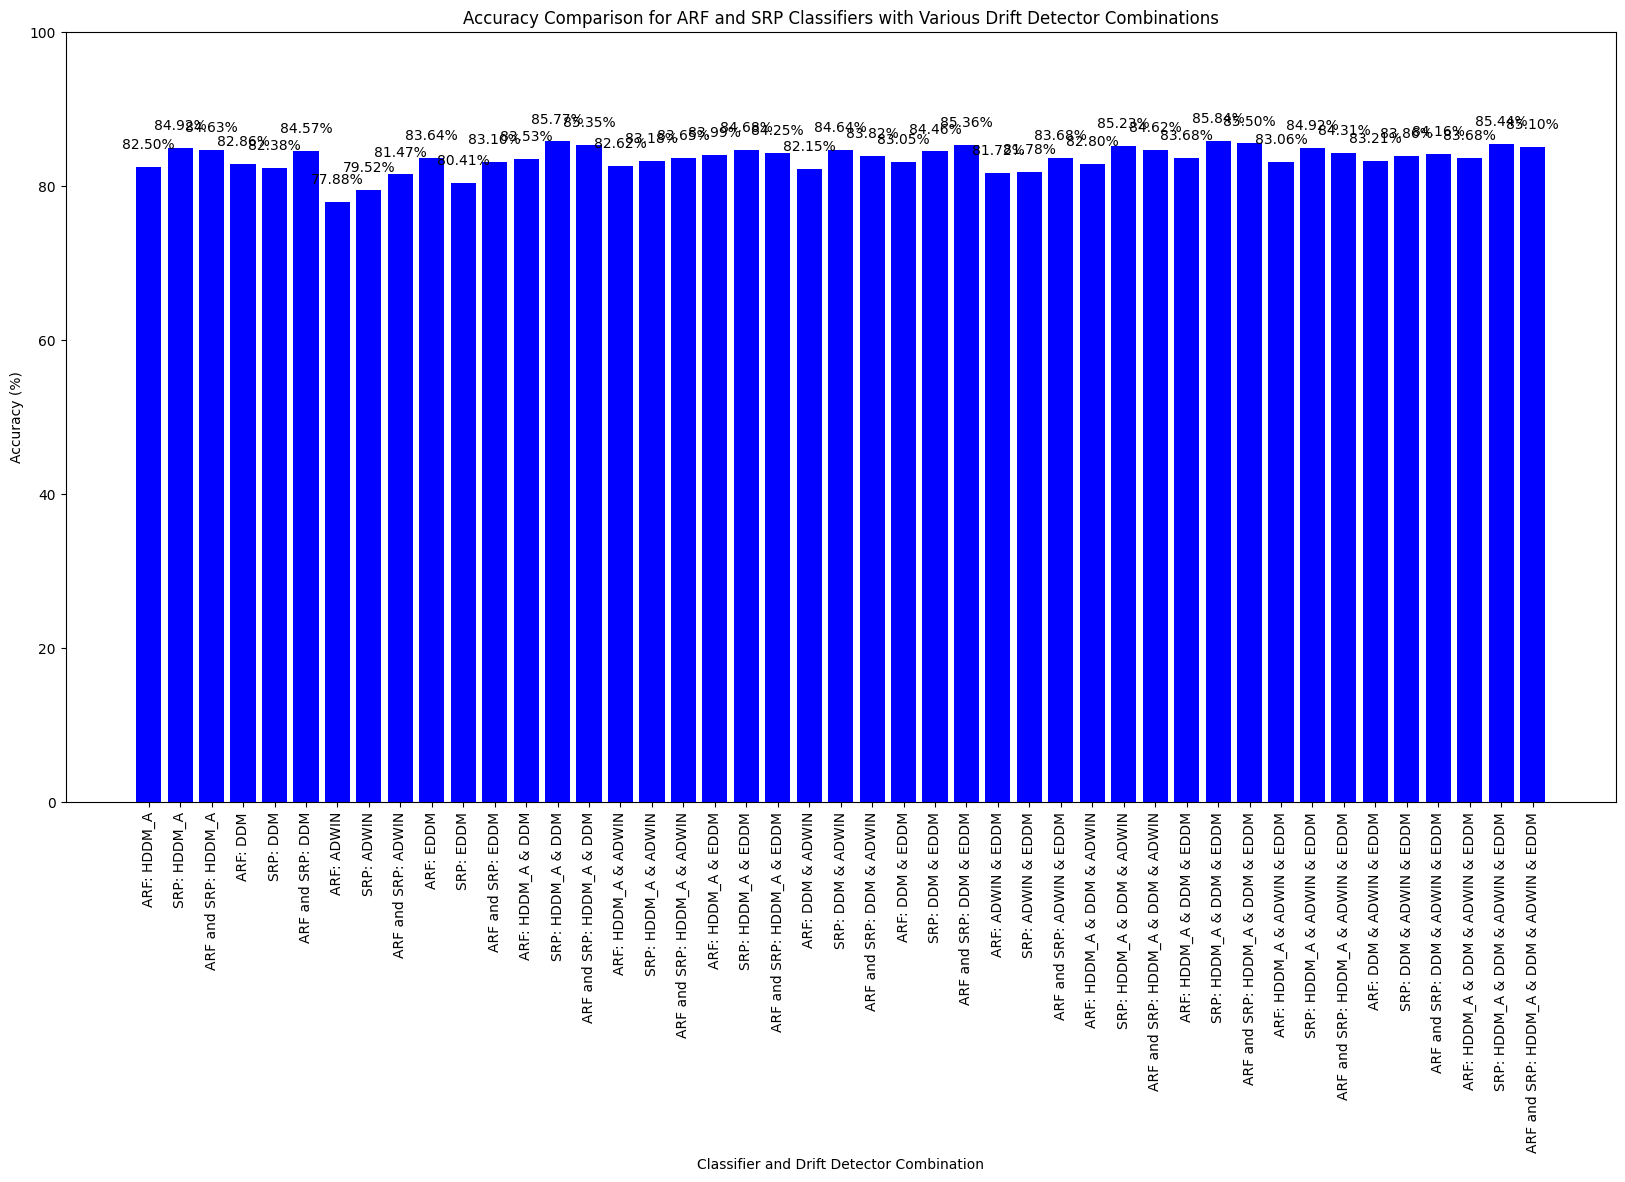

In [ ]:
from river import metrics, stream, ensemble, drift, forest
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

def NewApproach(X_train, y_train, X_test, y_test, base_learners, drift_detectors):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(len(base_learners) * len(drift_detectors))]

    # Initialize base learners
    all_learners = []
    for learner_cls in base_learners:
        for dd in drift_detectors:
            all_learners.append(learner_cls(n_models=5, drift_detector=dd(), warning_detector=dd()))

    # Train base learners on the training set
    for learner in all_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(all_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    # Print classification report
    print(classification_report(true_labels, predicted_labels))

    # Display performance metrics
    accuracy = accuracy_score(true_labels, predicted_labels) * 100
    precision = precision_score(true_labels, predicted_labels) * 100
    recall = recall_score(true_labels, predicted_labels) * 100
    f1 = f1_score(true_labels, predicted_labels) * 100

    print("Accuracy: {:.2f}%".format(accuracy))
    print("Precision: {:.2f}%".format(precision))
    print("Recall: {:.2f}%".format(recall))
    print("F1-score: {:.2f}%".format(f1))

    return accuracy, precision, recall, f1



# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert categorical target variable to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drift detectors
drift_detectors = [drift.binary.HDDM_A, drift.binary.DDM, drift.ADWIN, drift.binary.EDDM]

# Collecting accuracies
accuracies = {}

# Function to generate all combinations of drift detectors
def generate_combinations(drift_detectors):
    combos = []
    for r in range(1, len(drift_detectors) + 1):
        combos.extend(combinations(drift_detectors, r))
    return combos

# Evaluate each combination
for combo in generate_combinations(drift_detectors):
    combo_names = " & ".join([dd.__name__ for dd in combo])
    print(f"\nARF with {combo_names}:")
    accuracies[f'ARF: {combo_names}'] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier], combo)

    print(f"\nSRP with {combo_names}:")
    accuracies[f'SRP: {combo_names}'] = NewApproach(X_train, y_train, X_test, y_test, [ensemble.SRPClassifier], combo)

    print(f"\nBoth ARF and SRP with {combo_names}:")
    accuracies[f'ARF and SRP: {combo_names}'] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier, ensemble.SRPClassifier], combo)

# Plotting the accuracies
# Extracting the accuracies for plotting
labels = list(accuracies.keys())
accuracy_values = [acc[0] for acc in accuracies.values()]

# Create bar plot
plt.figure(figsize=(20, 10))
plt.bar(labels, accuracy_values, color='blue')
plt.xlabel('Classifier and Drift Detector Combination')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison for ARF and SRP Classifiers with Various Drift Detector Combinations')
plt.ylim(0, 100)

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracy_values):
    plt.text(i, acc + 2, f'{acc:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()


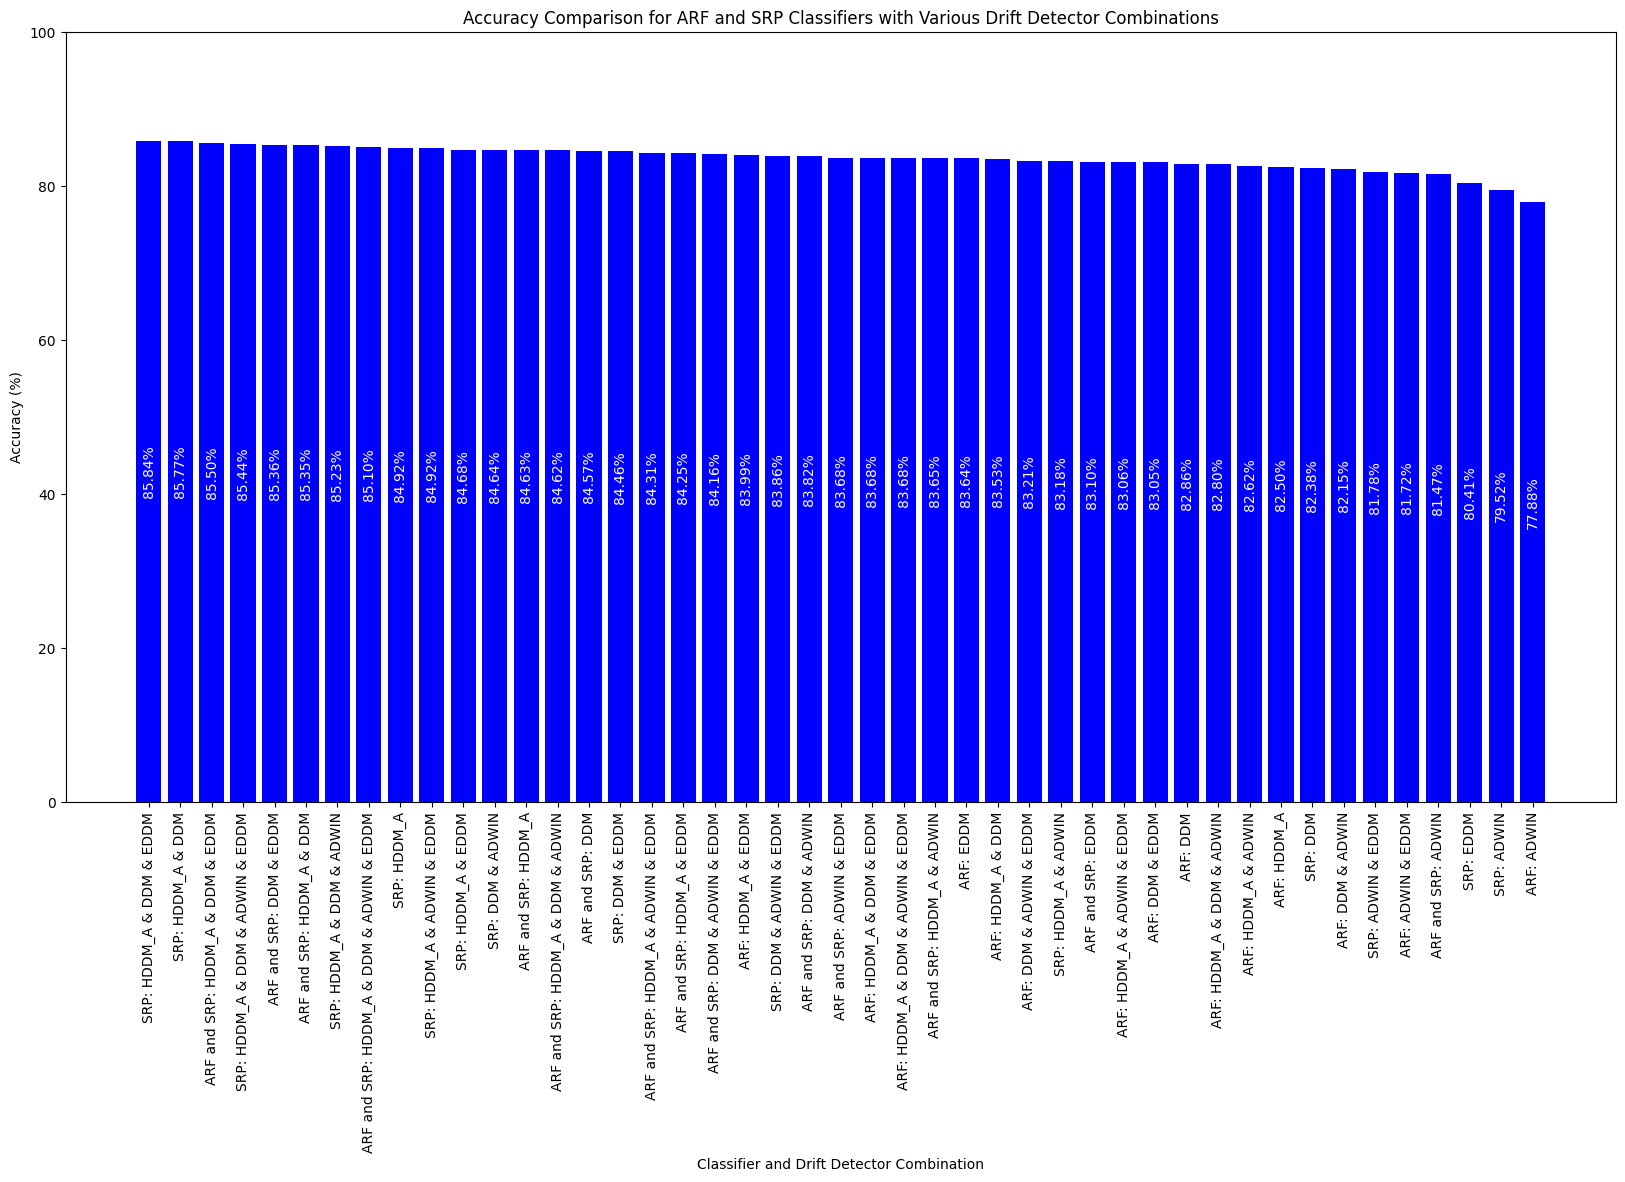

In [ ]:
# Plotting the accuracies
# Extracting the accuracies for plotting
labels = list(accuracies.keys())
accuracy_values = [acc[0] for acc in accuracies.values()]

# Sort labels and accuracy values based on accuracy
sorted_indices = sorted(range(len(accuracy_values)), key=lambda i: accuracy_values[i], reverse=True)
sorted_labels = [labels[i] for i in sorted_indices]
sorted_accuracy_values = [accuracy_values[i] for i in sorted_indices]

# Create bar plot
plt.figure(figsize=(20, 10))
bars = plt.bar(sorted_labels, sorted_accuracy_values, color='blue')
plt.xlabel('Classifier and Drift Detector Combination')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison for ARF and SRP Classifiers with Various Drift Detector Combinations')
plt.ylim(0, 100)

# Display the accuracy values vertically aligned inside the bars
for bar, acc in zip(bars, sorted_accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{acc:.2f}%', ha='center', va='center', color='white', rotation='vertical')

plt.xticks(rotation=90)
plt.show()

**best/cost**

In [ ]:
from river import metrics, stream, ensemble, drift, forest
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

def NewApproach(X_train, y_train, X_test, y_test, base_learners, drift_detectors):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(len(base_learners) * len(drift_detectors))]

    # Initialize base learners
    all_learners = []
    for learner_cls in base_learners:
        for dd in drift_detectors:
            all_learners.append(learner_cls(n_models=5, drift_detector=dd(), warning_detector=dd()))

    # Train base learners on the training set
    for learner in all_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(all_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    # Print classification report
    print(classification_report(true_labels, predicted_labels))

    # Display performance metrics
    accuracy = accuracy_score(true_labels, predicted_labels) * 100
    precision = precision_score(true_labels, predicted_labels) * 100
    recall = recall_score(true_labels, predicted_labels) * 100
    f1 = f1_score(true_labels, predicted_labels) * 100

    print("Accuracy: {:.2f}%".format(accuracy))
    print("Precision: {:.2f}%".format(precision))
    print("Recall: {:.2f}%".format(recall))
    print("F1-score: {:.2f}%".format(f1))

    return accuracy, precision, recall, f1

# Sample dataset loading
# Assuming 'df' is your DataFrame containing the dataset

# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert categorical target variable to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drift detectors
drift_detectors = [drift.binary.HDDM_A, drift.binary.DDM, drift.ADWIN, drift.binary.EDDM]

# Collecting accuracies
accuracies = {}

# Function to generate all combinations of drift detectors
def generate_combinations(drift_detectors):
    combos = []
    for r in range(1, len(drift_detectors) + 1):
        combos.extend(combinations(drift_detectors, r))
    return combos

# Evaluate each combination
for combo in generate_combinations(drift_detectors):
    combo_names = " & ".join([dd.__name__ for dd in combo])
    print(f"\nARF with {combo_names}:")
    accuracies[f'ARF: {combo_names}'] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier], combo)

    print(f"\nSRP with {combo_names}:")
    accuracies[f'SRP: {combo_names}'] = NewApproach(X_train, y_train, X_test, y_test, [ensemble.SRPClassifier], combo)

    print(f"\nBoth ARF and SRP with {combo_names}:")
    accuracies[f'ARF and SRP: {combo_names}'] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier, ensemble.SRPClassifier], combo)

# Dictionary to store the accuracies for each base learner count
accuracies_by_base_learner = defaultdict(list)

# Extract the base learner count from each model and store the accuracies
for model_name, accuracy in accuracies.items():
    base_learner_count = int(model_name.split()[-1])
    accuracies_by_base_learner[base_learner_count].append((model_name, accuracy))

# Sort the base learner counts in ascending order
sorted_base_learner_counts = sorted(accuracies_by_base_learner.keys())

# Map each base learner count to its index
base_learner_index = {count: i for i, count in enumerate(sorted_base_learner_counts)}

# Store the champion models and accuracies
champion_models = []

# Iterate through the sorted base learner counts
for base_learner_count in sorted_base_learner_counts:
    # Get the accuracies for the current base learner count
    accuracies = accuracies_by_base_learner[base_learner_count]

    # Get the index for the current base learner count
    index = base_learner_index[base_learner_count]

    # Find the champion model for the current base learner count
    champion_model, champion_accuracy = max(accuracies, key=lambda x: x[1])

    # Store the champion model and accuracy
    champion_models.append((champion_model, champion_accuracy))
# Plotting the accuracies
plt.figure(figsize=(10, 6))

# Iterate through the sorted base learner counts
for base_learner_count in sorted_base_learner_counts:
    # Get the accuracies for the current base learner count
    accuracies = accuracies_by_base_learner[base_learner_count]

    # Get the index for the current base learner count
    index = base_learner_index[base_learner_count]

    # Find the champion model for the current base learner count
    champion_model, champion_accuracy = max(accuracies, key=lambda x: x[1])

    # Plot the accuracy of the champion model
    plt.bar(str(index), champion_accuracy, color='blue')

# Add labels and title
plt.xlabel('Index of Base Learner Count')
plt.ylabel('Accuracy (%)')
plt.title('Champion Models by Base Learner Count')
plt.ylim(0, 100)

# Display the plot
plt.show()

# Output the champion models
print("Champion Models:")
for model, accuracy in champion_models:
    print(f"Model: {model}, Accuracy: {accuracy:.2f}%")



ARF with HDDM_A:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      5191
           1       0.82      0.76      0.79      3872

    accuracy                           0.83      9063
   macro avg       0.83      0.82      0.82      9063
weighted avg       0.83      0.83      0.83      9063

Accuracy: 82.77%
Precision: 82.17%
Recall: 76.19%
F1-score: 79.07%

SRP with HDDM_A:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      5191
           1       0.84      0.77      0.80      3872

    accuracy                           0.84      9063
   macro avg       0.84      0.83      0.83      9063
weighted avg       0.84      0.84      0.84      9063

Accuracy: 83.89%
Precision: 83.61%
Recall: 77.48%
F1-score: 80.43%

Both ARF and SRP with HDDM_A:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5191
           1       0.85      0.76   

ValueError: invalid literal for int() with base 10: 'HDDM_A'

In [ ]:
from river import metrics, stream, ensemble, drift, forest
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

def NewApproach(X_train, y_train, X_test, y_test, base_learners, drift_detectors):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(len(base_learners) * len(drift_detectors))]

    # Initialize base learners
    all_learners = []
    for learner_cls in base_learners:
        for dd in drift_detectors:
            all_learners.append(learner_cls(n_models=5, drift_detector=dd(), warning_detector=dd()))

    # Train base learners on the training set
    for learner in all_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(all_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    # Print classification report
    print(classification_report(true_labels, predicted_labels))

    # Display performance metrics
    accuracy = accuracy_score(true_labels, predicted_labels) * 100
    precision = precision_score(true_labels, predicted_labels) * 100
    recall = recall_score(true_labels, predicted_labels) * 100
    f1 = f1_score(true_labels, predicted_labels) * 100

    print("Accuracy: {:.2f}%".format(accuracy))
    print("Precision: {:.2f}%".format(precision))
    print("Recall: {:.2f}%".format(recall))
    print("F1-score: {:.2f}%".format(f1))

    return accuracy, precision, recall, f1

# Sample dataset loading
# Assuming 'df' is your DataFrame containing the dataset

# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert categorical target variable to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drift detectors
drift_detectors = [drift.binary.HDDM_A, drift.binary.DDM, drift.ADWIN, drift.binary.EDDM]

# Collecting accuracies
accuracies = {}
base_learner_counts = {}

# Function to generate all combinations of drift detectors
def generate_combinations(drift_detectors):
    combos = []
    for r in range(1, len(drift_detectors) + 1):
        combos.extend(combinations(drift_detectors, r))
    return combos

# Evaluate each combination
for combo in generate_combinations(drift_detectors):
    combo_names = " & ".join([dd.__name__ for dd in combo])

    # Single base learner models
    print(f"\nARF with {combo_names}:")
    model_name = f'ARF: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier], combo)
    base_learner_counts[model_name] = len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners")

    print(f"\nSRP with {combo_names}:")
    model_name = f'SRP: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [ensemble.SRPClassifier], combo)
    base_learner_counts[model_name] = len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners")

    # Combined models
    print(f"\nBoth ARF and SRP with {combo_names}:")
    model_name = f'ARF and SRP: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier, ensemble.SRPClassifier], combo)
    base_learner_counts[model_name] = 2 * len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners")

# Dictionary to store the accuracies for each base learner count
accuracies_by_base_learner = defaultdict(list)

# Extract the base learner count from each model and store the accuracies
for model_name, accuracy in accuracies.items():
    base_learner_count = base_learner_counts[model_name]
    accuracies_by_base_learner[base_learner_count].append((model_name, accuracy))

# Sort the base learner counts in ascending order
sorted_base_learner_counts = sorted(accuracies_by_base_learner.keys())

# Map each base learner count to its index
base_learner_index = {count: i for i, count in enumerate(sorted_base_learner_counts)}

# Select the champion models
champion_models = []
champion_accuracies = []

for base_learner_count in sorted_base_learner_counts:
    accuracies = accuracies_by_base_learner[base_learner_count]
    champion_model, champion_accuracy = max(accuracies, key=lambda x: x[1])
    champion_models.append(champion_model)
    champion_accuracies.append(champion_accuracy[0])

# Determine the ultimate champion
ultimate_champion_model = champion_models[0]
ultimate_champion_accuracy = champion_accuracies[0]

for i in range(1, len(champion_accuracies)):
    if (champion_accuracies[i] - ultimate_champion_accuracy) >= (i * 0.5):
        ultimate_champion_model = champion_models[i]
        ultimate_champion_accuracy = champion_accuracies[i]

# Plotting the accuracies
plt.figure(figsize=(10, 6))

# Iterate through the sorted base learner counts
for i, base_learner_count in enumerate(sorted_base_learner_counts):
    index = base_learner_index[base_learner_count]
    color = 'red' if champion_models[i] == ultimate_champion_model else 'blue'
    plt.bar(str(index), champion_accuracies[i], color=color)

# Add labels and title
plt.xlabel('Index of Base Learner Count')
plt.ylabel('Accuracy (%)')
plt.title('Champion Models by Base Learner Count')
plt.ylim(0, 100)

# Display the plot
plt.show()

# Output the champion models
print("Champion Models:")
for model, accuracy in zip(champion_models, champion_accuracies):
    print(f"Model: {model}, Accuracy: {accuracy:.2f}%")

print(f"Ultimate Champion Model: {ultimate_champion_model}, Accuracy: {ultimate_champion_accuracy:.2f}%")



ARF with HDDM_A:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      5191
           1       0.82      0.74      0.78      3872

    accuracy                           0.82      9063
   macro avg       0.82      0.81      0.81      9063
weighted avg       0.82      0.82      0.82      9063

Accuracy: 81.73%
Precision: 81.55%
Recall: 73.97%
F1-score: 77.57%
Model ARF: HDDM_A is in group 1 base learners

SRP with HDDM_A:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5191
           1       0.85      0.79      0.82      3872

    accuracy                           0.85      9063
   macro avg       0.85      0.84      0.84      9063
weighted avg       0.85      0.85      0.85      9063

Accuracy: 84.96%
Precision: 84.78%
Recall: 78.98%
F1-score: 81.78%
Model SRP: HDDM_A is in group 1 base learners

Both ARF and SRP with HDDM_A:
              precision    recall  f1-score   support

KeyboardInterrupt: 

**i hope it works**


ARF with HDDM_A:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      5191
           1       0.82      0.75      0.78      3872

    accuracy                           0.82      9063
   macro avg       0.82      0.81      0.82      9063
weighted avg       0.82      0.82      0.82      9063

Accuracy: 82.41%
Precision: 82.30%
Recall: 74.95%
F1-score: 78.45%
Model ARF: HDDM_A is in group 1 base learners

SRP with HDDM_A:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      5191
           1       0.84      0.79      0.81      3872

    accuracy                           0.84      9063
   macro avg       0.84      0.84      0.84      9063
weighted avg       0.84      0.84      0.84      9063

Accuracy: 84.41%
Precision: 83.64%
Recall: 78.95%
F1-score: 81.23%
Model SRP: HDDM_A is in group 1 base learners

Both ARF and SRP with HDDM_A:
              precision    recall  f1-score   support

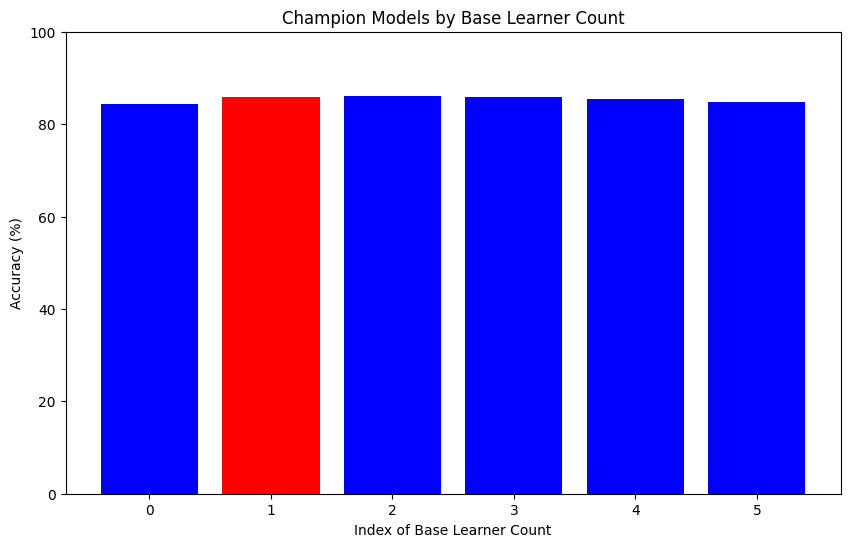

Champion Models:
Model: SRP: HDDM_A, Accuracy: 84.41%
Model: SRP: HDDM_A & EDDM, Accuracy: 85.88%
Model: SRP: HDDM_A & DDM & EDDM, Accuracy: 86.11%
Model: SRP: HDDM_A & DDM & ADWIN & EDDM, Accuracy: 85.82%
Model: ARF and SRP: HDDM_A & DDM & EDDM, Accuracy: 85.36%
Model: ARF and SRP: HDDM_A & DDM & ADWIN & EDDM, Accuracy: 84.87%
Ultimate Champion Model: SRP: HDDM_A & EDDM, Accuracy: 85.88%


In [ ]:
from river import metrics, stream, ensemble, drift, forest
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

def NewApproach(X_train, y_train, X_test, y_test, base_learners, drift_detectors):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(len(base_learners) * len(drift_detectors))]

    # Initialize base learners
    all_learners = []
    for learner_cls in base_learners:
        for dd in drift_detectors:
            all_learners.append(learner_cls(n_models=5, drift_detector=dd(), warning_detector=dd()))

    # Train base learners on the training set
    for learner in all_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(all_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    # Print classification report
    print(classification_report(true_labels, predicted_labels))

    # Display performance metrics
    accuracy = accuracy_score(true_labels, predicted_labels) * 100
    precision = precision_score(true_labels, predicted_labels) * 100
    recall = recall_score(true_labels, predicted_labels) * 100
    f1 = f1_score(true_labels, predicted_labels) * 100

    print("Accuracy: {:.2f}%".format(accuracy))
    print("Precision: {:.2f}%".format(precision))
    print("Recall: {:.2f}%".format(recall))
    print("F1-score: {:.2f}%".format(f1))

    return accuracy, precision, recall, f1

# Sample dataset loading
# Assuming 'df' is your DataFrame containing the dataset

# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert categorical target variable to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drift detectors
drift_detectors = [drift.binary.HDDM_A, drift.binary.DDM, drift.ADWIN, drift.binary.EDDM]

# Collecting accuracies
accuracies = {}
base_learner_counts = {}

# Function to generate all combinations of drift detectors
def generate_combinations(drift_detectors):
    combos = []
    for r in range(1, len(drift_detectors) + 1):
        combos.extend(combinations(drift_detectors, r))
    return combos

# Evaluate each combination
for combo in generate_combinations(drift_detectors):
    combo_names = " & ".join([dd.__name__ for dd in combo])

    # Single base learner models
    print(f"\nARF with {combo_names}:")
    model_name = f'ARF: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier], combo)
    base_learner_counts[model_name] = len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners")

    print(f"\nSRP with {combo_names}:")
    model_name = f'SRP: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [ensemble.SRPClassifier], combo)
    base_learner_counts[model_name] = len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners")

    # Combined models
    print(f"\nBoth ARF and SRP with {combo_names}:")
    model_name = f'ARF and SRP: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier, ensemble.SRPClassifier], combo)
    base_learner_counts[model_name] = 2 * len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners")

# Dictionary to store the accuracies for each base learner count
accuracies_by_base_learner = defaultdict(list)

# Extract the base learner count from each model and store the accuracies
for model_name, accuracy in accuracies.items():
    base_learner_count = base_learner_counts[model_name]
    accuracies_by_base_learner[base_learner_count].append((model_name, accuracy))

# Sort the base learner counts in ascending order
sorted_base_learner_counts = sorted(accuracies_by_base_learner.keys())

# Map each base learner count to its index
base_learner_index = {count: i for i, count in enumerate(sorted_base_learner_counts)}

# Select the champion models
champion_models = []
champion_accuracies = []

for base_learner_count in sorted_base_learner_counts:
    accuracies = accuracies_by_base_learner[base_learner_count]
    champion_model, champion_accuracy = max(accuracies, key=lambda x: x[1])
    champion_models.append(champion_model)
    champion_accuracies.append(champion_accuracy[0])

# Determine the ultimate champion
ultimate_champion_model = champion_models[0]
ultimate_champion_accuracy = champion_accuracies[0]

i = 1
while i < len(champion_accuracies):
    required_increase = i * 0.5
    if (champion_accuracies[i] - ultimate_champion_accuracy) >= required_increase:
        ultimate_champion_model = champion_models[i]
        ultimate_champion_accuracy = champion_accuracies[i]
        i = 0  # Reset the comparison index
    else:
        i += 1

# Plotting the accuracies
plt.figure(figsize=(10, 6))

# Iterate through the sorted base learner counts
for i, base_learner_count in enumerate(sorted_base_learner_counts):
    index = base_learner_index[base_learner_count]
    color = 'red' if champion_models[i] == ultimate_champion_model else 'blue'
    plt.bar(str(index), champion_accuracies[i], color=color)

# Add labels and title
plt.xlabel('Index of Base Learner Count')
plt.ylabel('Accuracy (%)')
plt.title('Champion Models by Base Learner Count')
plt.ylim(0, 100)

# Display the plot
plt.show()

# Output the champion models
print("Champion Models:")
for model, accuracy in zip(champion_models, champion_accuracies):
    print(f"Model: {model}, Accuracy: {accuracy:.2f}%")

print(f"Ultimate Champion Model: {ultimate_champion_model}, Accuracy: {ultimate_champion_accuracy:.2f}%")


**LAST**

In [ ]:
from river import metrics, stream, ensemble, drift, forest
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

# Function to implement the new approach
def NewApproach(X_train, y_train, X_test, y_test, base_learners, drift_detectors):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(len(base_learners) * len(drift_detectors))]

    # Initialize base learners
    all_learners = []
    for learner_cls in base_learners:
        for dd in drift_detectors:
            all_learners.append(learner_cls(n_models=5, drift_detector=dd(), warning_detector=dd()))

    # Train base learners on the training set
    for learner in all_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(all_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    # Display performance metrics
    accuracy = accuracy_score(true_labels, predicted_labels) * 100

    return accuracy

# Sample dataset loading
# Assuming 'df' is your DataFrame containing the dataset
# Replace 'data' with your actual data

df = pd.DataFrame(df)

# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert categorical target variable to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drift detectors
drift_detectors = [drift.binary.HDDM_A, drift.binary.DDM, drift.ADWIN, drift.binary.EDDM]

# Collecting accuracies
accuracies = {}
base_learner_counts = {}

# Function to generate all combinations of drift detectors
def generate_combinations(drift_detectors):
    combos = []
    for r in range(1, len(drift_detectors) + 1):
        combos.extend(combinations(drift_detectors, r))
    return combos

# Evaluate each combination
for combo in generate_combinations(drift_detectors):
    combo_names = " & ".join([dd.__name__ for dd in combo])

    # Single base learner models
    print(f"\nARF with {combo_names}:")
    model_name = f'ARF: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier], combo)
    base_learner_counts[model_name] = len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners, Accuracy: {accuracies[model_name]:.2f}%")

    print(f"\nSRP with {combo_names}:")
    model_name = f'SRP: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [ensemble.SRPClassifier], combo)
    base_learner_counts[model_name] = len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners, Accuracy: {accuracies[model_name]:.2f}%")

    # Combined models
    print(f"\nBoth ARF and SRP with {combo_names}:")
    model_name = f'ARF and SRP: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier, ensemble.SRPClassifier], combo)
    base_learner_counts[model_name] = 2 * len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners, Accuracy: {accuracies[model_name]:.2f}%")

# Dictionary to store the accuracies for each base learner count group
accuracies_by_base_learner = defaultdict(list)

# Extract the base learner count from each model and store the accuracies
for model_name, accuracy in accuracies.items():
    base_learner_count = base_learner_counts[model_name]
    accuracies_by_base_learner[base_learner_count].append((model_name, accuracy))

# Sort the base learner counts in ascending order
sorted_base_learner_counts = sorted(accuracies_by_base_learner.keys())

# Select the champion models
champion_models = []
champion_accuracies = []

for base_learner_count in sorted_base_learner_counts:
    accuracies = accuracies_by_base_learner[base_learner_count]
    champion_model, champion_accuracy = max(accuracies, key=lambda x: x[1])
    champion_models.append(champion_model)
    champion_accuracies.append(champion_accuracy)

# Determine the ultimate champion
ultimate_champion_model = champion_models[0]
ultimate_champion_accuracy = champion_accuracies[0]

i = 1
while i < len(champion_accuracies):
    required_increase = i * 0.2
    if (champion_accuracies[i] - ultimate_champion_accuracy) >= required_increase:
        ultimate_champion_model = champion_models[i]
        ultimate_champion_accuracy = champion_accuracies[i]
        i = 0  # Reset the comparison index
    else:
        i += 1

# Plotting the accuracies
plt.figure(figsize=(10, 12))  # Adjust figure size as per your preference

# Dictionary to store the colors for each base learner count group
color_map = defaultdict(lambda: 'blue')

# Assigning colors based on the number of base learners in each group
for i, base_learner_count in enumerate(sorted_base_learner_counts):
    if base_learner_count == 3:
        color_map[base_learner_count] = 'lightblue'
    elif base_learner_count == 6:
        color_map[base_learner_count] = 'red'
    else:
        color_map[base_learner_count] = 'blue'  # Default color for other groups

# Iterate through the sorted base learner counts
for i, base_learner_count in enumerate(sorted_base_learner_counts):
    index = i + 1  # Adjust index as needed
    color = color_map[base_learner_count]


    # Plotting champion model with zebra pattern
    champion_color = 'gold' if champion_models[i] == ultimate_champion_model else color

    # Plotting as vertical bars
    plt.barh(str(index), champion_accuracies[i], color=champion_color, label=f'{champion_models[i]}, Accuracy: {champion_accuracies[i]:.2f}%')
    plt.barh(str(index), accuracies_by_base_learner[base_learner_count][i][1], color=color, alpha=0.6)

    # Adding accuracy text beside each bar
    plt.text(champion_accuracies[i] + 1, index, f'{champion_accuracies[i]:.2f}%', va='center')
    plt.text(accuracies_by_base_learner[base_learner_count][i][1] + 1, index, f'{accuracies_by_base_learner[base_learner_count][i][1]:.2f}%', va='center')

# Add labels and title
plt.ylabel('Index of Base Learner Count')
plt.xlabel('Accuracy (%)')
plt.title('Champion Models by Base Learner Count')
plt.xlim(0, 100)

# Adding legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Output the champion models
print("\nChampion Models:")
for model, accuracy in zip(champion_models, champion_accuracies):
    print(f"Model: {model}, Accuracy: {accuracy:.2f}%")

print(f"Ultimate Champion Model: {ultimate_champion_model}, Accuracy: {ultimate_champion_accuracy:.2f}%")



ARF with HDDM_A:
Model ARF: HDDM_A is in group 1 base learners, Accuracy: 83.00%

SRP with HDDM_A:
Model SRP: HDDM_A is in group 1 base learners, Accuracy: 85.62%

Both ARF and SRP with HDDM_A:
Model ARF and SRP: HDDM_A is in group 2 base learners, Accuracy: 84.39%

ARF with DDM:
Model ARF: DDM is in group 1 base learners, Accuracy: 83.58%

SRP with DDM:
Model SRP: DDM is in group 1 base learners, Accuracy: 85.32%

Both ARF and SRP with DDM:
Model ARF and SRP: DDM is in group 2 base learners, Accuracy: 84.51%

ARF with ADWIN:
Model ARF: ADWIN is in group 1 base learners, Accuracy: 77.52%

SRP with ADWIN:
Model SRP: ADWIN is in group 1 base learners, Accuracy: 77.74%

Both ARF and SRP with ADWIN:
Model ARF and SRP: ADWIN is in group 2 base learners, Accuracy: 80.60%

ARF with EDDM:
Model ARF: EDDM is in group 1 base learners, Accuracy: 82.26%

SRP with EDDM:
Model SRP: EDDM is in group 1 base learners, Accuracy: 81.05%

Both ARF and SRP with EDDM:
Model ARF and SRP: EDDM is in group 2 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from river import metrics, stream, ensemble, drift, forest
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from collections import defaultdict
from itertools import combinations

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

# Function to implement the new approach
def NewApproach(X_train, y_train, X_test, y_test, base_learners, drift_detectors):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(len(base_learners) * len(drift_detectors))]

    # Initialize base learners
    all_learners = []
    for learner_cls in base_learners:
        for dd in drift_detectors:
            all_learners.append(learner_cls(n_models=5, drift_detector=dd(), warning_detector=dd()))

    # Train base learners on the training set
    for learner in all_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    true_labels = []
    predicted_labels = []
    accuracies_over_time = []  # List to store accuracies over time

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(all_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        # Calculate accuracy at this iteration
        current_accuracy = accuracy_score(true_labels, predicted_labels) * 100
        accuracies_over_time.append(current_accuracy)

        iteration += 1

    return accuracies_over_time

# Sample dataset loading
# Assuming 'df' is your DataFrame containing the dataset
# Replace 'data' with your actual data

df = pd.DataFrame(df)

# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert categorical target variable to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drift detectors
drift_detectors = [drift.binary.HDDM_A, drift.binary.DDM, drift.ADWIN, drift.binary.EDDM]

# Collecting accuracies
accuracies = {}
base_learner_counts = {}

# Function to generate all combinations of drift detectors
def generate_combinations(drift_detectors):
    combos = []
    for r in range(1, len(drift_detectors) + 1):
        combos.extend(combinations(drift_detectors, r))
    return combos

# Evaluate each combination
for combo in generate_combinations(drift_detectors):
    combo_names = " & ".join([dd.__name__ for dd in combo])

    # Single base learner models
    print(f"\nARF with {combo_names}:")
    model_name = f'ARF: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier], combo)
    base_learner_counts[model_name] = len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners, Accuracy: {accuracies[model_name][-1]:.2f}%")

    print(f"\nSRP with {combo_names}:")
    model_name = f'SRP: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [ensemble.SRPClassifier], combo)
    base_learner_counts[model_name] = len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners, Accuracy: {accuracies[model_name][-1]:.2f}%")

    # Combined models
    print(f"\nBoth ARF and SRP with {combo_names}:")
    model_name = f'ARF and SRP: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier, ensemble.SRPClassifier], combo)
    base_learner_counts[model_name] = 2 * len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners, Accuracy: {accuracies[model_name][-1]:.2f}%")

# Plotting the accuracies
plt.figure(figsize=(12, 8))

# Prepare data for plotting
bar_labels = []
bar_values = []
bar_colors = []

# Iterate through the sorted base learner counts
for i, base_learner_count in enumerate(sorted_base_learner_counts):
    approach_name = champion_models[i]  # Use the approach name
    accuracy = champion_accuracies[i]   # Accuracy for the current approach

    index = base_learner_index[base_learner_count]
    color = 'red' if champion_models[i] == ultimate_champion_model else 'blue'

    plt.bar(approach_name, accuracy, color=color)

    # Prepare data for annotations
    bar_labels.append(approach_name)
    bar_values.append(accuracy)
    bar_colors.append(color)

# Add labels and title
plt.xlabel('Approach Name')
plt.ylabel('Accuracy (%)')
plt.title('Champion Models by Approach')
plt.ylim(0, 100)

# Annotate bars with accuracy values
for label, value, color in zip(bar_labels, bar_values, bar_colors):
    plt.text(label, value + 1, f'{value:.2f}%', ha='center', va='bottom', color='black' if color == 'red' else 'white')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


# Output the champion models
print("\nChampion Models:")
for model, accuracy in zip(champion_models, champion_accuracies):
    print(f"Model: {model}, Accuracy: {accuracy:.2f}%")

print(f"Ultimate Champion Model: {ultimate_champion_model}, Accuracy: {ultimate_champion_accuracy:.2f}%")


ModuleNotFoundError: No module named 'river'

**last**


ARF with HDDM_A:
Accuracy: 81.67%
Model ARF: HDDM_A is in group 1 base learners

SRP with HDDM_A:
Accuracy: 83.95%
Model SRP: HDDM_A is in group 1 base learners

Both ARF and SRP with HDDM_A:
Accuracy: 84.48%
Model ARF and SRP: HDDM_A is in group 2 base learners

ARF with DDM:
Accuracy: 82.40%
Model ARF: DDM is in group 1 base learners

SRP with DDM:
Accuracy: 82.61%
Model SRP: DDM is in group 1 base learners

Both ARF and SRP with DDM:
Accuracy: 84.92%
Model ARF and SRP: DDM is in group 2 base learners

ARF with ADWIN:
Accuracy: 77.77%
Model ARF: ADWIN is in group 1 base learners

SRP with ADWIN:
Accuracy: 80.01%
Model SRP: ADWIN is in group 1 base learners

Both ARF and SRP with ADWIN:
Accuracy: 80.36%
Model ARF and SRP: ADWIN is in group 2 base learners

ARF with EDDM:
Accuracy: 82.83%
Model ARF: EDDM is in group 1 base learners

SRP with EDDM:
Accuracy: 84.12%
Model SRP: EDDM is in group 1 base learners

Both ARF and SRP with EDDM:
Accuracy: 85.19%
Model ARF and SRP: EDDM is in gr

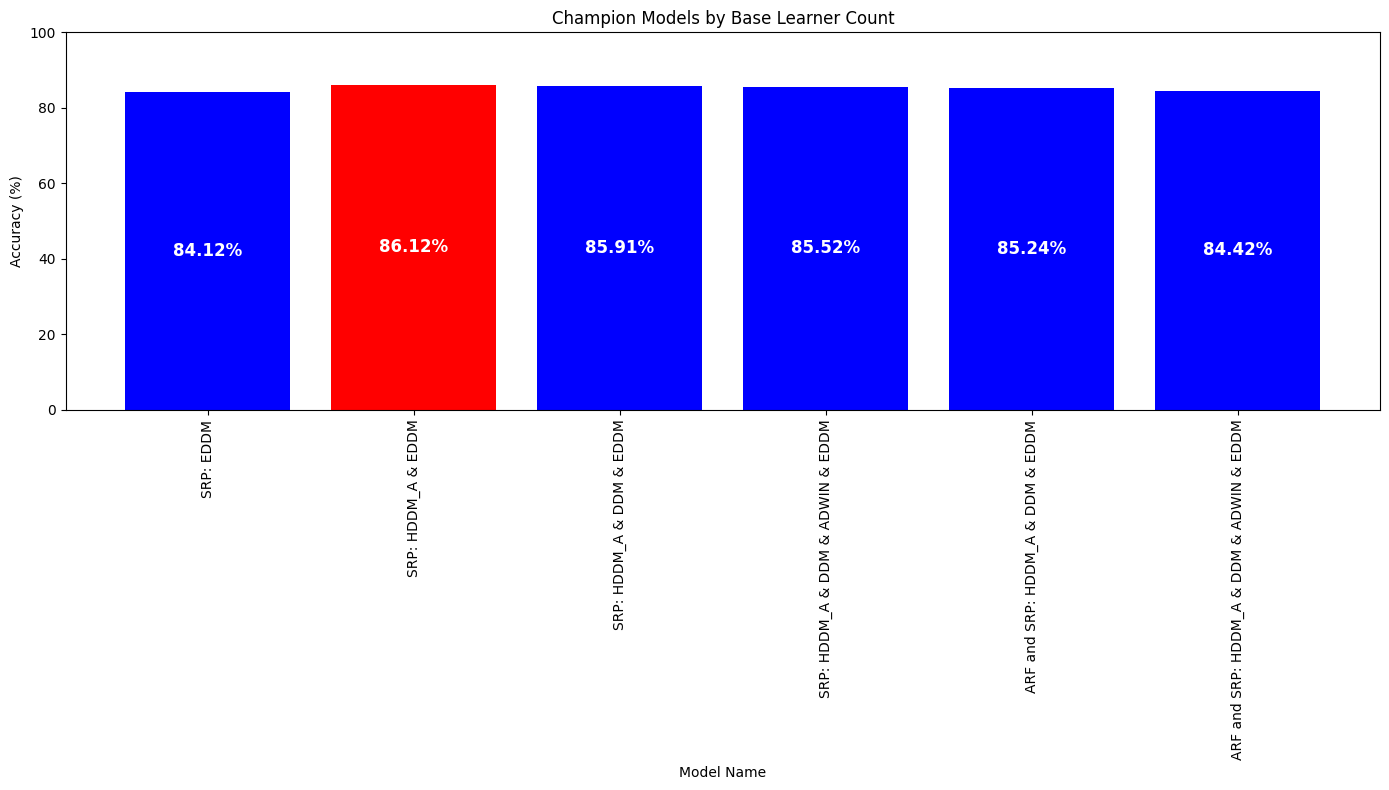

Champion Models:
Model: SRP: EDDM, Accuracy: 84.12%
Model: SRP: HDDM_A & EDDM, Accuracy: 86.12%
Model: SRP: HDDM_A & DDM & EDDM, Accuracy: 85.91%
Model: SRP: HDDM_A & DDM & ADWIN & EDDM, Accuracy: 85.52%
Model: ARF and SRP: HDDM_A & DDM & EDDM, Accuracy: 85.24%
Model: ARF and SRP: HDDM_A & DDM & ADWIN & EDDM, Accuracy: 84.42%
Ultimate Champion Model: SRP: HDDM_A & EDDM, Accuracy: 86.12%


In [ ]:
from river import metrics, stream, ensemble, drift, forest
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

def NewApproach(X_train, y_train, X_test, y_test, base_learners, drift_detectors):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(len(base_learners) * len(drift_detectors))]

    # Initialize base learners
    all_learners = []
    for learner_cls in base_learners:
        for dd in drift_detectors:
            all_learners.append(learner_cls(n_models=5, drift_detector=dd(), warning_detector=dd()))

    # Train base learners on the training set
    for learner in all_learners:
        train_model(learner, X_train, y_train)

    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(all_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

    # Display performance metrics
    accuracy = accuracy_score(true_labels, predicted_labels) * 100
    print("Accuracy: {:.2f}%".format(accuracy))

    return accuracy


# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert categorical target variable to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drift detectors
drift_detectors = [drift.binary.HDDM_A, drift.binary.DDM, drift.ADWIN, drift.binary.EDDM]

# Collecting accuracies
accuracies = {}
base_learner_counts = {}

# Function to generate all combinations of drift detectors
def generate_combinations(drift_detectors):
    combos = []
    for r in range(1, len(drift_detectors) + 1):
        combos.extend(combinations(drift_detectors, r))
    return combos

# Evaluate each combination
for combo in generate_combinations(drift_detectors):
    combo_names = " & ".join([dd.__name__ for dd in combo])

    # Single base learner models
    print(f"\nARF with {combo_names}:")
    model_name = f'ARF: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier], combo)
    base_learner_counts[model_name] = len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners")

    print(f"\nSRP with {combo_names}:")
    model_name = f'SRP: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [ensemble.SRPClassifier], combo)
    base_learner_counts[model_name] = len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners")

    # Combined models
    print(f"\nBoth ARF and SRP with {combo_names}:")
    model_name = f'ARF and SRP: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier, ensemble.SRPClassifier], combo)
    base_learner_counts[model_name] = 2 * len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners")

# Dictionary to store the accuracies for each base learner count
accuracies_by_base_learner = defaultdict(list)

# Extract the base learner count from each model and store the accuracies
for model_name, accuracy in accuracies.items():
    base_learner_count = base_learner_counts[model_name]
    accuracies_by_base_learner[base_learner_count].append((model_name, accuracy))

# Sort the base learner counts in ascending order
sorted_base_learner_counts = sorted(accuracies_by_base_learner.keys())

# Map each base learner count to its index
base_learner_index = {count: i for i, count in enumerate(sorted_base_learner_counts)}

# Select the champion models
champion_models = []
champion_accuracies = []

for base_learner_count in sorted_base_learner_counts:
    accuracies = accuracies_by_base_learner[base_learner_count]
    champion_model, champion_accuracy = max(accuracies, key=lambda x: x[1])
    champion_models.append(champion_model)
    champion_accuracies.append(champion_accuracy)

# Determine the ultimate champion
ultimate_champion_model = champion_models[0]
ultimate_champion_accuracy = champion_accuracies[0]

i = 1
while i < len(champion_accuracies):
    required_increase = i * 0.2
    if (champion_accuracies[i] - ultimate_champion_accuracy) >= required_increase:
        ultimate_champion_model = champion_models[i]
        ultimate_champion_accuracy = champion_accuracies[i]
        i = 0  # Reset the comparison index
    else:
        i += 1

# Plotting the accuracies
plt.figure(figsize=(14, 8))  # Adjust figure size to accommodate model names

# Iterate through the sorted base learner counts and plot the bars
for i, (model, accuracy) in enumerate(zip(champion_models, champion_accuracies)):
    color = 'red' if model == ultimate_champion_model else 'blue'
    bar = plt.bar(model, accuracy, color=color)

    # Adding the accuracy value inside the bar
    plt.text(bar[0].get_x() + bar[0].get_width() / 2, bar[0].get_height() / 2,
             f'{accuracy:.2f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Model Name')
plt.ylabel('Accuracy (%)')
plt.title('Champion Models by Base Learner Count')
plt.ylim(0, 100)

# Display the plot
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()

# Output the champion models
print("Champion Models:")
for model, accuracy in zip(champion_models, champion_accuracies):
    print(f"Model: {model}, Accuracy: {accuracy:.2f}%")

print(f"Ultimate Champion Model: {ultimate_champion_model}, Accuracy: {ultimate_champion_accuracy:.2f}%")


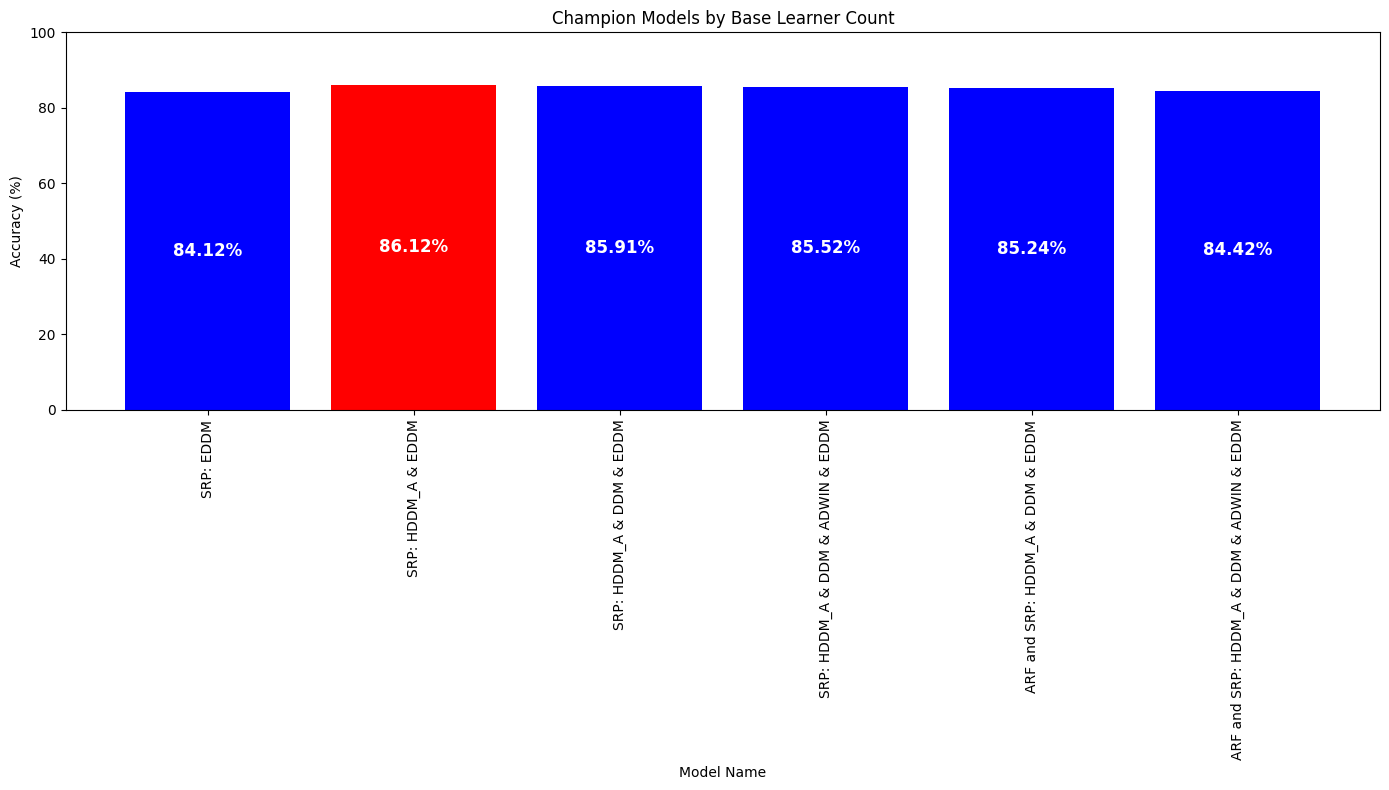

Champion Models:
Model: SRP: EDDM, Accuracy: 84.12%
Model: SRP: HDDM_A & EDDM, Accuracy: 86.12%
Model: SRP: HDDM_A & DDM & EDDM, Accuracy: 85.91%
Model: SRP: HDDM_A & DDM & ADWIN & EDDM, Accuracy: 85.52%
Model: ARF and SRP: HDDM_A & DDM & EDDM, Accuracy: 85.24%
Model: ARF and SRP: HDDM_A & DDM & ADWIN & EDDM, Accuracy: 84.42%
Ultimate Champion Model: SRP: HDDM_A & EDDM, Accuracy: 86.12%


In [ ]:
i = 1
while i < len(champion_accuracies):
    required_increase = i * 0.02
    if (champion_accuracies[i] - ultimate_champion_accuracy) >= required_increase:
        ultimate_champion_model = champion_models[i]
        ultimate_champion_accuracy = champion_accuracies[i]
        i = 0  # Reset the comparison index
    else:
        i += 1

# Plotting the accuracies
plt.figure(figsize=(14, 8))  # Adjust figure size to accommodate model names

# Iterate through the sorted base learner counts and plot the bars
for i, (model, accuracy) in enumerate(zip(champion_models, champion_accuracies)):
    color = 'red' if model == ultimate_champion_model else 'blue'
    bar = plt.bar(model, accuracy, color=color)

    # Adding the accuracy value inside the bar
    plt.text(bar[0].get_x() + bar[0].get_width() / 2, bar[0].get_height() / 2,
             f'{accuracy:.2f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Model Name')
plt.ylabel('Accuracy (%)')
plt.title('Champion Models by Base Learner Count')
plt.ylim(0, 100)

# Display the plot
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()

# Output the champion models
print("Champion Models:")
for model, accuracy in zip(champion_models, champion_accuracies):
    print(f"Model: {model}, Accuracy: {accuracy:.2f}%")

print(f"Ultimate Champion Model: {ultimate_champion_model}, Accuracy: {ultimate_champion_accuracy:.2f}%")

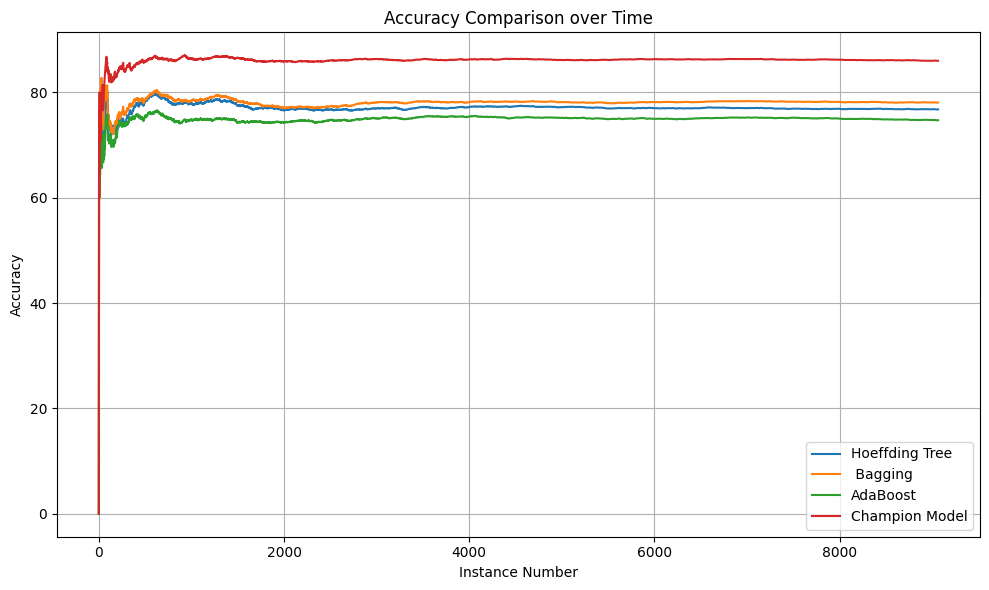

In [ ]:
from river import metrics, stream, tree, ensemble, drift
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to evaluate a model on a given dataset
def evaluate_model(model, X_test, y_test):
    metric = metrics.Accuracy()
    accuracies = []
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        y_pred = model.predict_one(X_test_sample)
        metric.update(y_test_sample, y_pred)
        accuracies.append(metric.get())
    return accuracies

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

# Function to train DWM ensemble
def train_dwm_ensemble(base_learners, X_train, y_train, X_test, y_test):
    # Initialize metrics for base learners and DWM
    base_metrics = [metrics.Accuracy() for _ in base_learners]
    dwm_metric = metrics.Accuracy()

    # Train base learners on the training set
    for learner in base_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    iterations = []
    ensemble_accuracies = []
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(base_learners, base_metrics):
            y_pred, y_prob = learner.predict_one(X_test_sample), learner.predict_proba_one(X_test_sample)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)
            metric.update(y_test_sample, y_pred)

        # Calculate weights for the base learners using DWM approach
        weights = calculate_weights(base_metrics)

        # Make DWM ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update DWM ensemble metric
        dwm_metric.update(y_test_sample, ensemble_pred[0])

        iterations.append(iteration)
        ensemble_accuracies.append(dwm_metric.get() * 100)
        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    return iterations, ensemble_accuracies, true_labels, predicted_labels


# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

#convert categorical target variable to numerical using LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
model_ht = tree.HoeffdingTreeClassifier(

)

model_lb = ensemble.BaggingClassifier(
    model=tree.HoeffdingTreeClassifier(),
    n_models=5,
    seed=42
)

model_ab = ensemble.AdaBoostClassifier(
    model=tree.HoeffdingTreeClassifier(),
    n_models=5,
    seed=42
)

# Initialize base learners for DWM
Champion_Model = [

    ensemble.SRPClassifier(n_models=5,drift_detector=drift.binary.HDDM_A(),warning_detector=drift.binary.HDDM_A(),seed=42),
    ensemble.SRPClassifier(n_models=5, drift_detector=drift.binary.DDM(),warning_detector=drift.binary.DDM(),seed=42)
]

# Train and evaluate models
iterations_ht, accuracies_ht, _, _ = train_dwm_ensemble([model_ht], X_train, y_train, X_test, y_test)
iterations_lb, accuracies_lb, _, _ = train_dwm_ensemble([model_lb], X_train, y_train, X_test, y_test)
iterations_ab, accuracies_ab, _, _ = train_dwm_ensemble([model_ab], X_train, y_train, X_test, y_test)
iterations_dwm, accuracies_dwm, _, _ = train_dwm_ensemble(Champion_Model, X_train, y_train, X_test, y_test)

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(iterations_ht, accuracies_ht, label='Hoeffding Tree')
plt.plot(iterations_lb, accuracies_lb, label=' Bagging')
plt.plot(iterations_ab, accuracies_ab, label='AdaBoost')
plt.plot(iterations_dwm, accuracies_dwm, label='Champion Model')
plt.title('Accuracy Comparison over Time')
plt.xlabel('Instance Number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()



ARF with HDDM_A:
Accuracy: 82.95%
Model ARF: HDDM_A is in group 1 base learners

SRP with HDDM_A:
Accuracy: 84.27%
Model SRP: HDDM_A is in group 1 base learners

Both ARF and SRP with HDDM_A:
Accuracy: 84.84%
Model ARF and SRP: HDDM_A is in group 2 base learners

ARF with DDM:
Accuracy: 82.53%
Model ARF: DDM is in group 1 base learners

SRP with DDM:
Accuracy: 85.51%
Model SRP: DDM is in group 1 base learners

Both ARF and SRP with DDM:
Accuracy: 84.67%
Model ARF and SRP: DDM is in group 2 base learners

ARF with ADWIN:
Accuracy: 78.85%
Model ARF: ADWIN is in group 1 base learners

SRP with ADWIN:
Accuracy: 81.31%
Model SRP: ADWIN is in group 1 base learners

Both ARF and SRP with ADWIN:
Accuracy: 81.66%
Model ARF and SRP: ADWIN is in group 2 base learners

ARF with EDDM:
Accuracy: 82.60%
Model ARF: EDDM is in group 1 base learners

SRP with EDDM:
Accuracy: 82.80%
Model SRP: EDDM is in group 1 base learners

Both ARF and SRP with EDDM:
Accuracy: 83.28%
Model ARF and SRP: EDDM is in gr

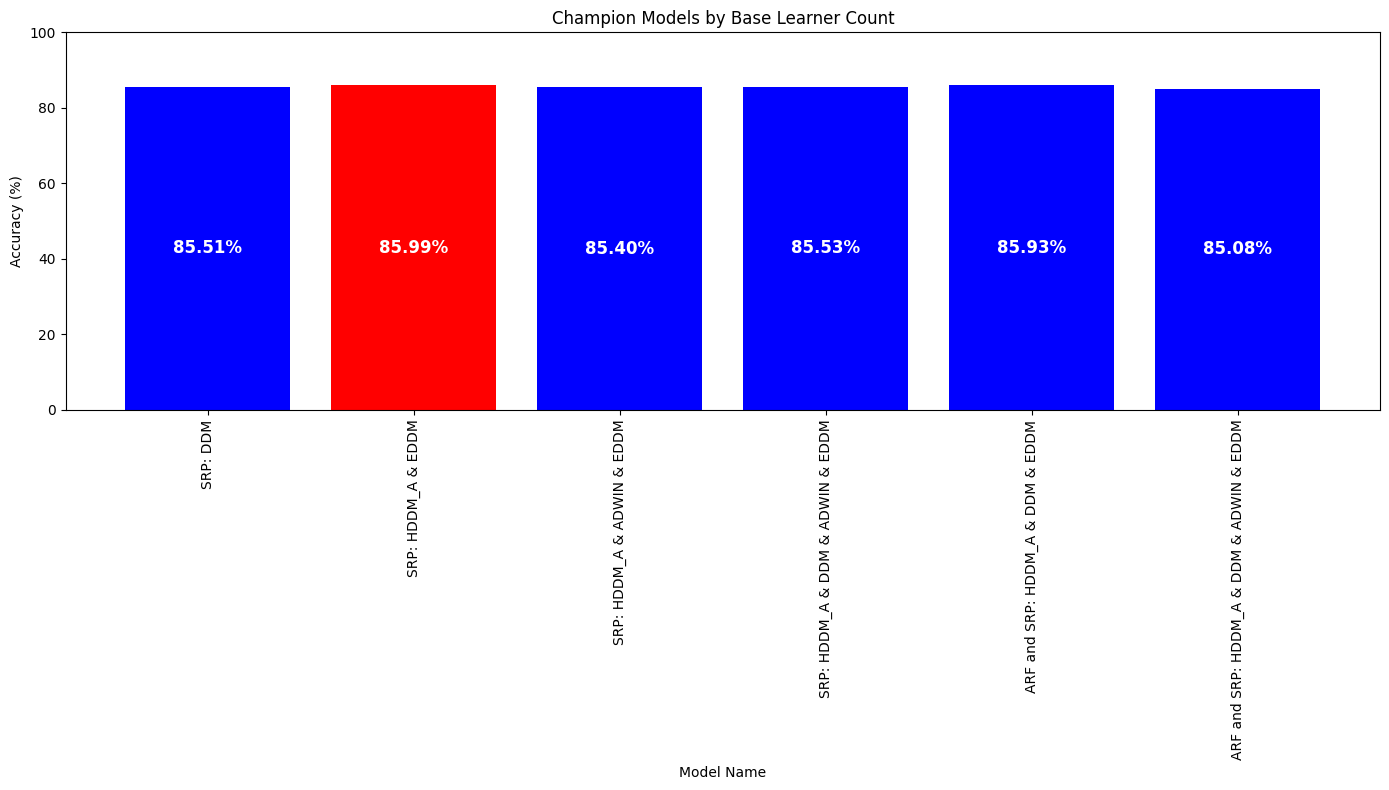

Champion Models:
Model: SRP: DDM, Accuracy: 85.51%
Model: SRP: HDDM_A & EDDM, Accuracy: 85.99%
Model: SRP: HDDM_A & ADWIN & EDDM, Accuracy: 85.40%
Model: SRP: HDDM_A & DDM & ADWIN & EDDM, Accuracy: 85.53%
Model: ARF and SRP: HDDM_A & DDM & EDDM, Accuracy: 85.93%
Model: ARF and SRP: HDDM_A & DDM & ADWIN & EDDM, Accuracy: 85.08%
Ultimate Champion Model: SRP: HDDM_A & EDDM, Accuracy: 85.99%


In [ ]:
from river import metrics, stream, ensemble, drift, forest
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to update model metrics and learn on new data
def update_model(model, X_test_sample, y_test_sample, metric):
    y_pred = model.predict_one(X_test_sample)
    y_prob = model.predict_proba_one(X_test_sample)
    model.learn_one(X_test_sample, y_test_sample)
    metric.update(y_test_sample, y_pred)
    return y_pred, y_prob

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

def NewApproach(X_train, y_train, X_test, y_test, base_learners, drift_detectors):
    # Initialize metrics for ensemble and base learners
    ensemble_metric = metrics.Accuracy()
    base_metrics = [metrics.Accuracy() for _ in range(len(base_learners) * len(drift_detectors))]

    # Initialize base learners
    all_learners = []
    for learner_cls in base_learners:
        for dd in drift_detectors:
            all_learners.append(learner_cls(n_models=5, drift_detector=dd(), warning_detector=dd()))

    # Train base learners on the training set
    for learner in all_learners:
        train_model(learner, X_train, y_train)

    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(all_learners, base_metrics):
            y_pred, y_prob = update_model(learner, X_test_sample, y_test_sample, metric)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)

        # Calculate weights for the base learners
        weights = calculate_weights(base_metrics)

        # Make ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update ensemble metric
        ensemble_metric.update(y_test_sample, ensemble_pred[0])

        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

    # Display performance metrics
    accuracy = accuracy_score(true_labels, predicted_labels) * 100
    print("Accuracy: {:.2f}%".format(accuracy))

    return accuracy


# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert categorical target variable to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drift detectors
drift_detectors = [drift.binary.HDDM_A, drift.binary.DDM, drift.ADWIN, drift.binary.EDDM]

# Collecting accuracies
accuracies = {}
base_learner_counts = {}

# Function to generate all combinations of drift detectors
def generate_combinations(drift_detectors):
    combos = []
    for r in range(1, len(drift_detectors) + 1):
        combos.extend(combinations(drift_detectors, r))
    return combos

# Evaluate each combination
for combo in generate_combinations(drift_detectors):
    combo_names = " & ".join([dd.__name__ for dd in combo])

    # Single base learner models
    print(f"\nARF with {combo_names}:")
    model_name = f'ARF: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier], combo)
    base_learner_counts[model_name] = len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners")

    print(f"\nSRP with {combo_names}:")
    model_name = f'SRP: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [ensemble.SRPClassifier], combo)
    base_learner_counts[model_name] = len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners")

    # Combined models
    print(f"\nBoth ARF and SRP with {combo_names}:")
    model_name = f'ARF and SRP: {combo_names}'
    accuracies[model_name] = NewApproach(X_train, y_train, X_test, y_test, [forest.ARFClassifier, ensemble.SRPClassifier], combo)
    base_learner_counts[model_name] = 2 * len(combo)
    print(f"Model {model_name} is in group {base_learner_counts[model_name]} base learners")

# Dictionary to store the accuracies for each base learner count
accuracies_by_base_learner = defaultdict(list)

# Extract the base learner count from each model and store the accuracies
for model_name, accuracy in accuracies.items():
    base_learner_count = base_learner_counts[model_name]
    accuracies_by_base_learner[base_learner_count].append((model_name, accuracy))

# Sort the base learner counts in ascending order
sorted_base_learner_counts = sorted(accuracies_by_base_learner.keys())

# Map each base learner count to its index
base_learner_index = {count: i for i, count in enumerate(sorted_base_learner_counts)}

# Select the champion models
champion_models = []
champion_accuracies = []

for base_learner_count in sorted_base_learner_counts:
    accuracies = accuracies_by_base_learner[base_learner_count]
    champion_model, champion_accuracy = max(accuracies, key=lambda x: x[1])
    champion_models.append(champion_model)
    champion_accuracies.append(champion_accuracy)

# Determine the ultimate champion
ultimate_champion_model = champion_models[0]
ultimate_champion_accuracy = champion_accuracies[0]

i = 1
while i < len(champion_accuracies):
    required_increase = i * 0.2
    if (champion_accuracies[i] - ultimate_champion_accuracy) >= required_increase:
        ultimate_champion_model = champion_models[i]
        ultimate_champion_accuracy = champion_accuracies[i]
        i = 0  # Reset the comparison index
    else:
        i += 1

# Plotting the accuracies
plt.figure(figsize=(14, 8))  # Adjust figure size to accommodate model names

# Iterate through the sorted base learner counts and plot the bars
for i, (model, accuracy) in enumerate(zip(champion_models, champion_accuracies)):
    color = 'red' if model == ultimate_champion_model else 'blue'
    bar = plt.bar(model, accuracy, color=color)

    # Adding the accuracy value inside the bar
    plt.text(bar[0].get_x() + bar[0].get_width() / 2, bar[0].get_height() / 2,
             f'{accuracy:.2f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Model Name')
plt.ylabel('Accuracy (%)')
plt.title('Champion Models by Base Learner Count')
plt.ylim(0, 100)

# Display the plot
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()

# Output the champion models
print("Champion Models:")
for model, accuracy in zip(champion_models, champion_accuracies):
    print(f"Model: {model}, Accuracy: {accuracy:.2f}%")

print(f"Ultimate Champion Model: {ultimate_champion_model}, Accuracy: {ultimate_champion_accuracy:.2f}%")


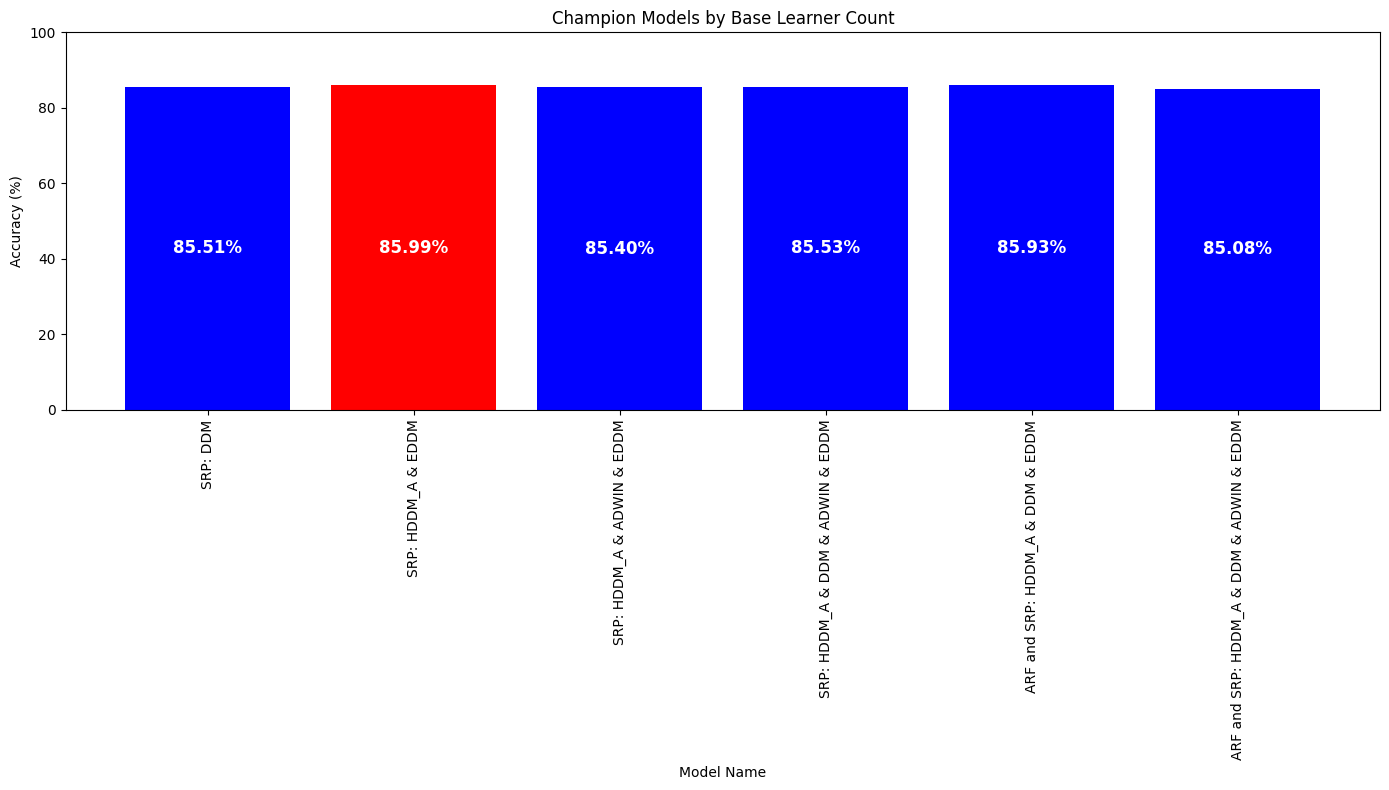

Champion Models:
Model: SRP: DDM, Accuracy: 85.51%
Model: SRP: HDDM_A & EDDM, Accuracy: 85.99%
Model: SRP: HDDM_A & ADWIN & EDDM, Accuracy: 85.40%
Model: SRP: HDDM_A & DDM & ADWIN & EDDM, Accuracy: 85.53%
Model: ARF and SRP: HDDM_A & DDM & EDDM, Accuracy: 85.93%
Model: ARF and SRP: HDDM_A & DDM & ADWIN & EDDM, Accuracy: 85.08%
Ultimate Champion Model: SRP: HDDM_A & EDDM, Accuracy: 85.99%


In [ ]:
# Determine the ultimate champion
ultimate_champion_model = champion_models[0]
ultimate_champion_accuracy = champion_accuracies[0]

i = 1
while i < len(champion_accuracies):
    required_increase = i * 0.02
    if (champion_accuracies[i] - ultimate_champion_accuracy) >= required_increase:
        ultimate_champion_model = champion_models[i]
        ultimate_champion_accuracy = champion_accuracies[i]
        i = 0  # Reset the comparison index
    else:
        i += 1

# Plotting the accuracies
plt.figure(figsize=(14, 8))  # Adjust figure size to accommodate model names

# Iterate through the sorted base learner counts and plot the bars
for i, (model, accuracy) in enumerate(zip(champion_models, champion_accuracies)):
    color = 'red' if model == ultimate_champion_model else 'blue'
    bar = plt.bar(model, accuracy, color=color)

    # Adding the accuracy value inside the bar
    plt.text(bar[0].get_x() + bar[0].get_width() / 2, bar[0].get_height() / 2,
             f'{accuracy:.2f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Model Name')
plt.ylabel('Accuracy (%)')
plt.title('Champion Models by Base Learner Count')
plt.ylim(0, 100)

# Display the plot
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()

# Output the champion models
print("Champion Models:")
for model, accuracy in zip(champion_models, champion_accuracies):
    print(f"Model: {model}, Accuracy: {accuracy:.2f}%")

print(f"Ultimate Champion Model: {ultimate_champion_model}, Accuracy: {ultimate_champion_accuracy:.2f}%")

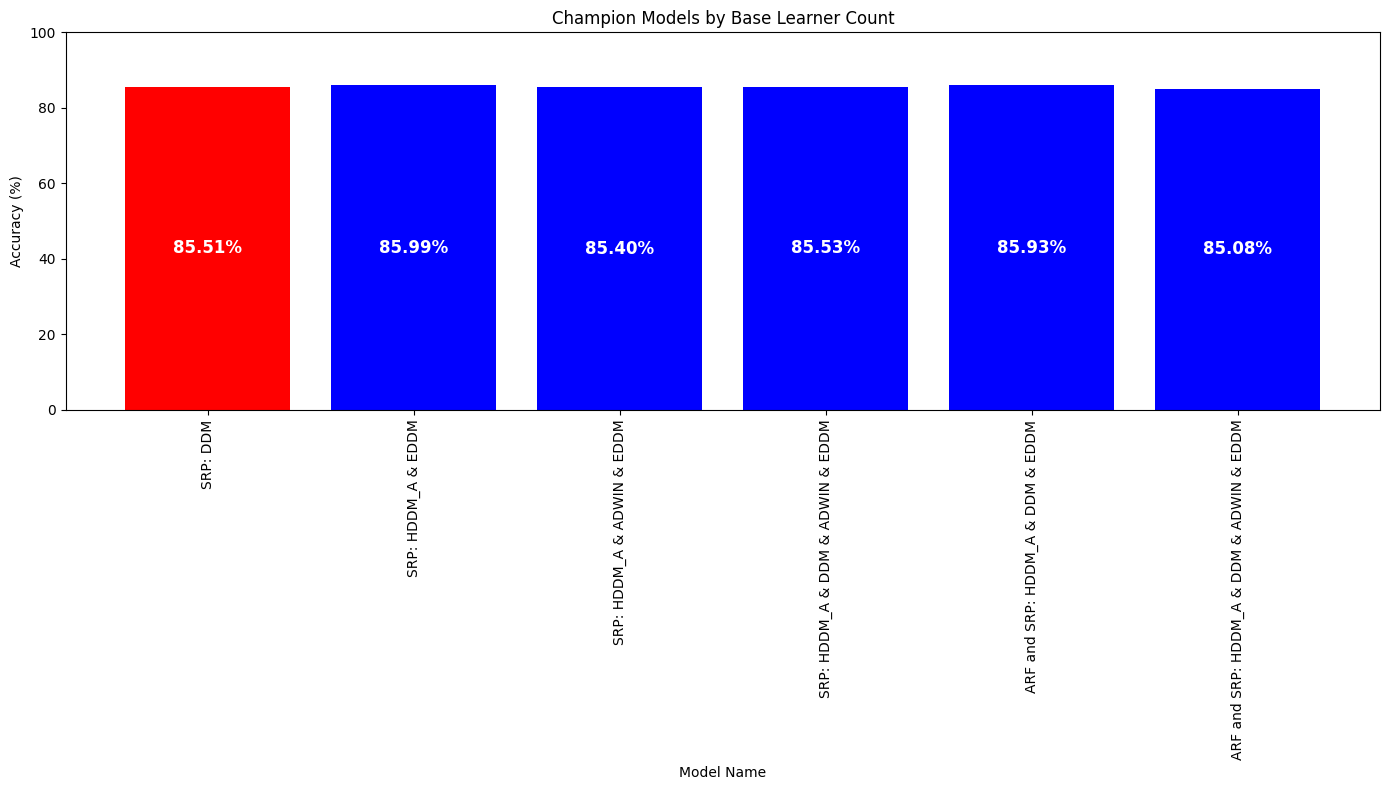

Champion Models:
Model: SRP: DDM, Accuracy: 85.51%
Model: SRP: HDDM_A & EDDM, Accuracy: 85.99%
Model: SRP: HDDM_A & ADWIN & EDDM, Accuracy: 85.40%
Model: SRP: HDDM_A & DDM & ADWIN & EDDM, Accuracy: 85.53%
Model: ARF and SRP: HDDM_A & DDM & EDDM, Accuracy: 85.93%
Model: ARF and SRP: HDDM_A & DDM & ADWIN & EDDM, Accuracy: 85.08%
Ultimate Champion Model: SRP: DDM, Accuracy: 85.51%


In [ ]:
# Determine the ultimate champion
ultimate_champion_model = champion_models[0]
ultimate_champion_accuracy = champion_accuracies[0]

i = 1
while i < len(champion_accuracies):
    required_increase = i * 0.9
    if (champion_accuracies[i] - ultimate_champion_accuracy) >= required_increase:
        ultimate_champion_model = champion_models[i]
        ultimate_champion_accuracy = champion_accuracies[i]
        i = 0  # Reset the comparison index
    else:
        i += 1

# Plotting the accuracies
plt.figure(figsize=(14, 8))  # Adjust figure size to accommodate model names

# Iterate through the sorted base learner counts and plot the bars
for i, (model, accuracy) in enumerate(zip(champion_models, champion_accuracies)):
    color = 'red' if model == ultimate_champion_model else 'blue'
    bar = plt.bar(model, accuracy, color=color)

    # Adding the accuracy value inside the bar
    plt.text(bar[0].get_x() + bar[0].get_width() / 2, bar[0].get_height() / 2,
             f'{accuracy:.2f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Model Name')
plt.ylabel('Accuracy (%)')
plt.title('Champion Models by Base Learner Count')
plt.ylim(0, 100)

# Display the plot
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()

# Output the champion models
print("Champion Models:")
for model, accuracy in zip(champion_models, champion_accuracies):
    print(f"Model: {model}, Accuracy: {accuracy:.2f}%")

print(f"Ultimate Champion Model: {ultimate_champion_model}, Accuracy: {ultimate_champion_accuracy:.2f}%")

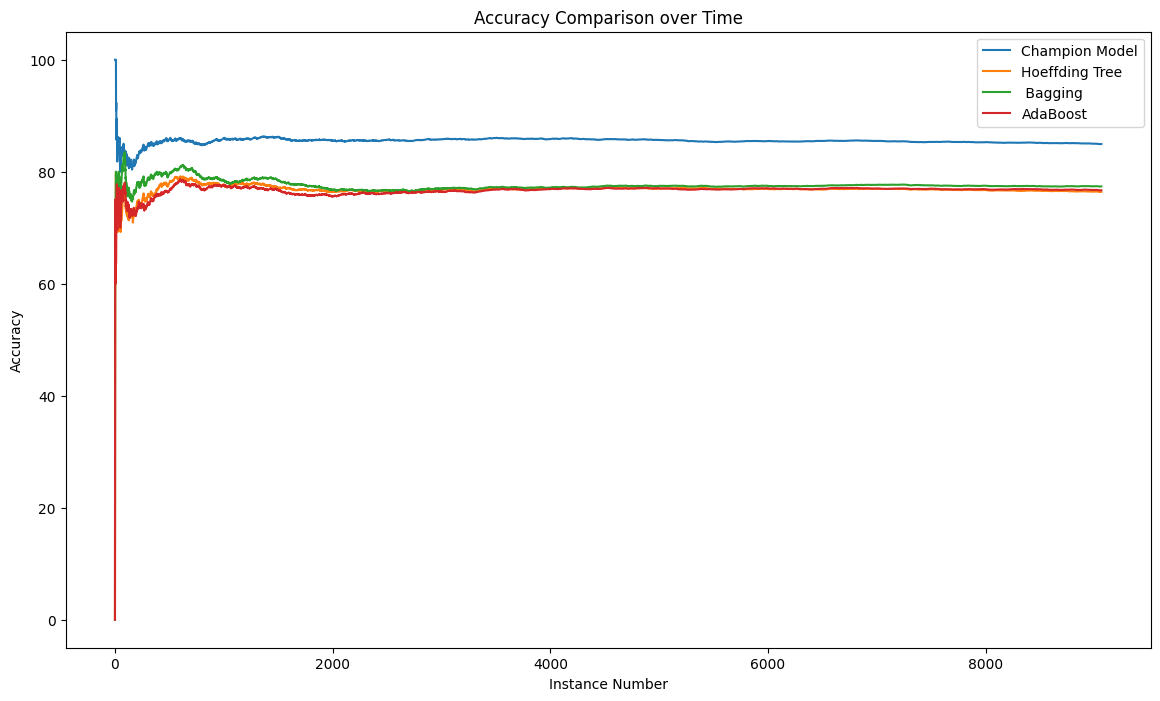

In [ ]:
from river import metrics, stream, tree, ensemble, drift
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Function to train a model on a given dataset
def train_model(model, X_train, y_train):
    for X_train_sample, y_train_sample in stream.iter_pandas(X_train, y_train):
        model.learn_one(X_train_sample, y_train_sample)

# Function to evaluate a model on a given dataset
def evaluate_model(model, X_test, y_test):
    metric = metrics.Accuracy()
    accuracies = []
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        y_pred = model.predict_one(X_test_sample)
        metric.update(y_test_sample, y_pred)
        accuracies.append(metric.get())
    return accuracies

# Function to calculate weights based on error rates
def calculate_weights(metrics, epsilon=0.001):
    errors = [1 - metric.get() for metric in metrics]
    total_error_inv = sum(1 / (error + epsilon) for error in errors)
    weights = [(1 / (error + epsilon)) / total_error_inv for error in errors]
    return weights

# Function to make ensemble prediction
def ensemble_prediction(probs, weights):
    prob_class_0 = sum(weight * prob.get(0, 0) for prob, weight in zip(probs, weights))
    prob_class_1 = sum(weight * prob.get(1, 0) for prob, weight in zip(probs, weights))
    return [0 if prob_class_0 > prob_class_1 else 1]

# Function to train DWM ensemble
def train_dwm_ensemble(base_learners, X_train, y_train, X_test, y_test):
    # Initialize metrics for base learners and DWM
    base_metrics = [metrics.Accuracy() for _ in base_learners]
    dwm_metric = metrics.Accuracy()

    # Train base learners on the training set
    for learner in base_learners:
        train_model(learner, X_train, y_train)

    iteration = 0
    iterations = []
    ensemble_accuracies = []
    true_labels = []
    predicted_labels = []

    # Predict the test set
    for X_test_sample, y_test_sample in stream.iter_pandas(X_test, y_test):
        # Update base learners and record predictions and probabilities
        base_predictions = []
        base_probabilities = []
        for learner, metric in zip(base_learners, base_metrics):
            y_pred, y_prob = learner.predict_one(X_test_sample), learner.predict_proba_one(X_test_sample)
            base_predictions.append(y_pred)
            base_probabilities.append(y_prob)
            metric.update(y_test_sample, y_pred)

        # Calculate weights for the base learners using DWM approach
        weights = calculate_weights(base_metrics)

        # Make DWM ensemble prediction
        ensemble_pred = ensemble_prediction(base_probabilities, weights)

        # Update DWM ensemble metric
        dwm_metric.update(y_test_sample, ensemble_pred[0])

        iterations.append(iteration)
        ensemble_accuracies.append(dwm_metric.get() * 100)
        true_labels.append(y_test_sample)
        predicted_labels.append(ensemble_pred[0])

        iteration += 1

    return iterations, ensemble_accuracies, true_labels, predicted_labels


# Let's assume the last column is the target
target_column = df.columns[-1]

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

#convert categorical target variable to numerical using LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
model_ht = tree.HoeffdingTreeClassifier(


)

model_lb = ensemble.BaggingClassifier(
    model=tree.HoeffdingTreeClassifier(),
    n_models=5,
    seed=42
)


model_ab = ensemble.AdaBoostClassifier(
    model=tree.HoeffdingTreeClassifier(),
    n_models=5,
    seed=42
)


# Initialize base learners for DWM
Champion_Model = [

    ensemble.SRPClassifier(n_models=5, drift_detector=drift.binary.HDDM_A(),warning_detector=drift.binary.HDDM_A(),seed=42),
    ensemble.SRPClassifier(n_models=5, drift_detector=drift.binary.EDDM(),warning_detector=drift.binary.EDDM(),seed=42)
]

# Train and evaluate models
iterations_ht, accuracies_ht, _, _ = train_dwm_ensemble([model_ht], X_train, y_train, X_test, y_test)
iterations_lb, accuracies_lb, _, _ = train_dwm_ensemble([model_lb], X_train, y_train, X_test, y_test)
iterations_ab, accuracies_ab, _, _ = train_dwm_ensemble([model_ab], X_train, y_train, X_test, y_test)
iterations_dwm, accuracies_dwm, _, _ = train_dwm_ensemble(Champion_Model, X_train, y_train, X_test, y_test)

# Plot accuracies
plt.figure(figsize=(14, 8))
plt.plot(iterations_dwm, accuracies_dwm, label='Champion Model')
plt.plot(iterations_ht, accuracies_ht, label='Hoeffding Tree')
plt.plot(iterations_lb, accuracies_lb, label=' Bagging')
plt.plot(iterations_ab, accuracies_ab, label='AdaBoost')

plt.title('Accuracy Comparison over Time')
plt.xlabel('Instance Number')
plt.ylabel('Accuracy')
plt.legend()


# Show plot
plt.show()
